## Цели задачи:  
- Построить 2-х уровневую rec-sys модель на датасете movielens 100k https://grouplens.org/datasets/movielens/100k/  
- Провести валидацию полученной модели 

## Краткое описание решения задачи

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">  

### 1 Подготовка данных   
Есть три источника данных: данные о пользователе, о фильме и о рейтингах, я спарсил дополнительные данные для каждого фильма (актеры, режиссёры, бюджет и т д)  
Знакомимся и очищаем и обрабатываем данные, переводя их в цифровой формат для дальнейшего использования в моделях   

### 2 Построение моделей    
Построил следующие модели для различных групп данных:  

- SVD
- Implicit KNN
- ALS (Alternating Least Squares)
- LightFM
- LGBMRanker
- NMF and dssm  

Так же описал теорию как работают эти модели  

### 3 Метрики качества    

Посчитал метрики для всех моделей, а также расписал теорию по ним  

- Распределение оценок для различных моделей
- Precision at K (Precision@K)
- MAP
- Normalized Discounted Cumulative Gain at K (nDCG@K)
- Mean reciprocal rank (MRR@K)

в пункте "3.2.6 All metrisc" есть сразу все метрики для всех моделей в одной табличке, можно сразу посмотреть

### 4 Метрики разнообразия рекомендаций  

Посчитал метрики для всех моделей, а также расписал теорию по ним  
- Intra-List Diversity (𝐼𝐿𝐷)
- Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)
- Serendipity  

в пункте "4.5 ALL Diversity metrics" есть сразу все метрики для всех моделей в одной табличке, можно сразу посмотреть


### 5 Статистический критерий  

Показываю как при помощи критерия t-Стьюендата можно понять - лучше ли 2-ая модель чем 1-ая или же качество отличается незначимо:  

- Делим выборку на 10 частей  
- Рассчитываем Ранги для каждой из 10 выборок для двух моделей LGBMRanker_1 и LGBMRanker_2  
LGBMRanker_1 - модель для набора данных без результатов 1-го этапа моделей  
LGBMRanker_2 - модель для набора данных c результатами 1-го этапа моделей  

- Считаю показатель качества MMR_K для каждой из 2-х моделей для каждой из 10 выборок  
- Считаю p_valuе для Двухвыборочного критерий Стьюдента(t-test) связанных выборок  

## <span style="color:red">!!! Чтобы не читать каждую строчку кода, можно смотреть краткое описание каждого пункта в аналогичных синих рамках</span>  

## Схема программы

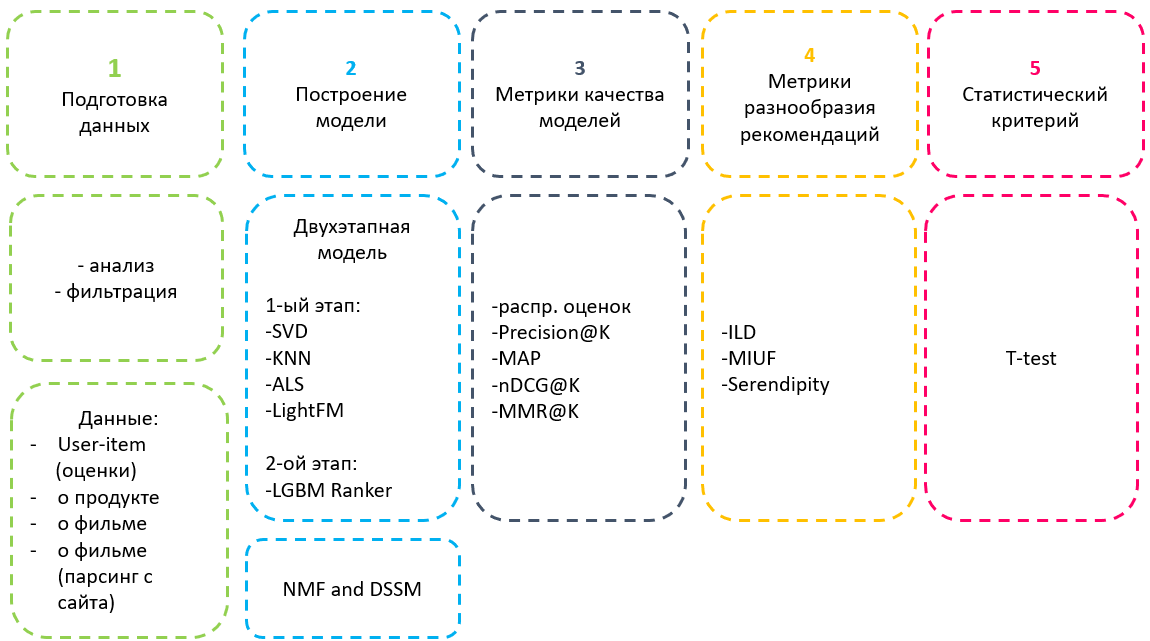

## Связь данных с моделями

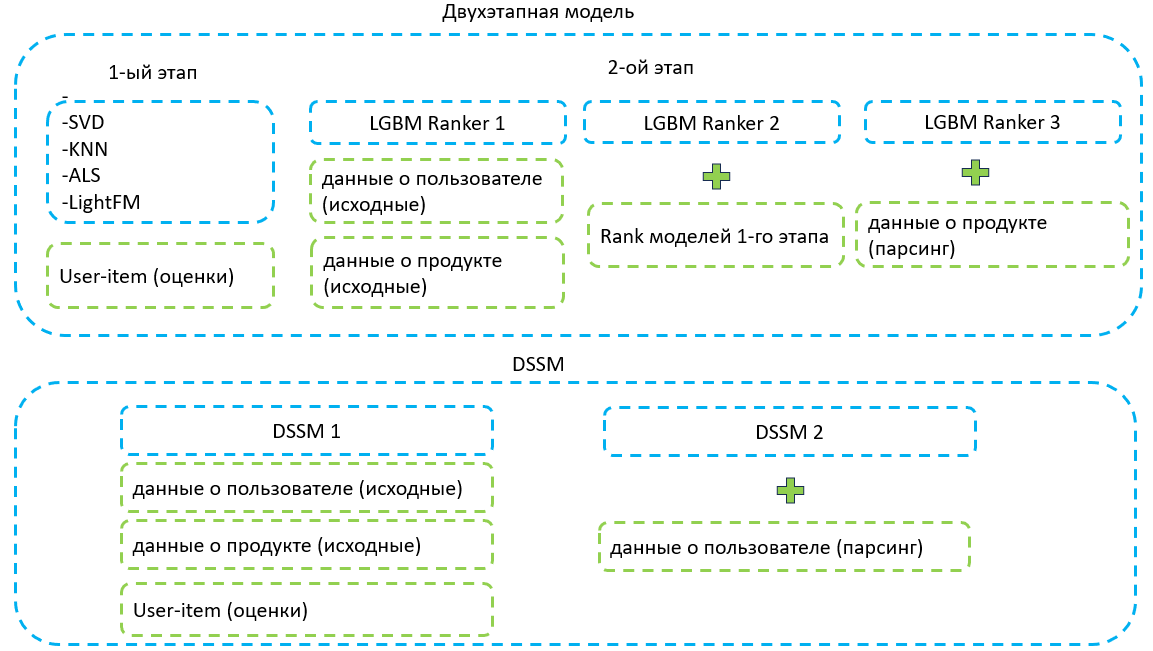

## Оглавление  

<a href="#1-Подготовка-данных" style="margin-left: 0px;">1 Подготовка данных</a>  
<a href="#1.1-Загрузка-данных" style="margin-left: 30px;">1.1 Загрузка данных</a>  
<a href="#1.2-Анализ-данных" style="margin-left: 30px;">1.2 Анализ данных</a>  
<a href="#1.2.1-Готовим-фичи-для-таблиц-users-и-items" style="margin-left: 50px;">1.2.1 Готовим фичи для таблиц users и items</a>  
<a href="#1.2.2-Собираем-матрицу-взаимодействий" style="margin-left: 50px;">1.2.2 Собираем матрицу взаимодействий</a>  
 
<a href="#2-Построение-моделей" style="margin-left: 0px;">2 Построение моделей</a>  
<a href="#2.1-Двухэтапная-модель" style="margin-left: 30px;">2.1 Двухэтапная модель</a>  
<a href="#2.1.1-Первый-этап.-Коллаборативная-фильтрация" style="margin-left: 50px;">2.1.1 Первый этап. Коллаборативная фильтрация</a>  
<a href="#2.1.1.1-SVD" style="margin-left: 70px;">2.1.1.1 SVD</a>   
<a href="#2.1.1.2-Implicit-KNN" style="margin-left: 70px;">2.1.1.2 Implicit KNN</a>   
<a href="#2.1.1.2.1-CosineRecommender" style="margin-left: 90px;">2.1.1.2.1 CosineRecommender</a>    
<a href="#2.1.1.2.2-BM25Recommender" style="margin-left: 90px;"> 2.1.1.2.2 BM25Recommender</a>   
<a href="#2.1.1.2.3-TFIDFRecommender" style="margin-left: 90px;">2.1.1.2.3 TFIDFRecommender</a>  
<a href="#2.1.1.3-ALS-(Alternating-Least-Squares)" style="margin-left: 70px;">2.1.1.3 ALS (Alternating Least Squares)</a>  
<a href="#2.1.1.4-LightFM" style="margin-left: 70px;">2.1.1.4 LightFM</a>    

<a href="#2.1.2-Второй-этап.-Улучшение-модели-ранжирования.-LGBMRanker()" style="margin-left: 50px;">2.1.2 Второй этап. Улучшение модели ранжирования. LGBMRanker()</a>   

<a href="#2.2-NMF-and-dssm" style="margin-left: 30px;">2.2 NMF and dssm</a>   
<a href="#2.2.1-Функция-потерь" style="margin-left: 50px;">2.2.1 Функция потерь</a>   
<a href="#2.2.2-generator" style="margin-left: 50px;">2.2.2 generator</a>   
<a href="#2.2.3-Архитектура-модели" style="margin-left: 50px;">2.2.3 Архитектура модели</a>   
<a href="#2.2.4-Построение-модели" style="margin-left: 50px;">2.2.4 Построение модели</a>   


<a href="#3-Метрики-качества" style="margin-left: 0px;">3 Метрики качества</a>  

<a href="#3.1-Очистка-выборки-Test" style="margin-left: 30px;">3.1 Очистка выборки Test</a>     
<a href="#3.2-Рассчёт-метрик" style="margin-left: 30px;">3.3 Рассчёт метрик</a>   
<a href="#3.2.1-Распределение-оценок-для-различных-моделей" style="margin-left: 50px;">3.2.1 Распределение оценок для различных моделей</a>   
<a href="#3.2.2-Precision-at-K-(Precision@K)" style="margin-left: 50px;">3.2.2 Precision at K (Precision@K)</a>  
<a href="#3.2.3-MAP" style="margin-left: 50px;">3.2.3 MAP</a>   
<a href="#3.2.4-Normalized-Discounted-Cumulative-Gain-at-K-(nDCG@K)" style="margin-left: 50px;">3.2.4 Normalized Discounted Cumulative Gain at K (nDCG@K)</a>    
<a href="3.2.5-Mean-reciprocal-rank-(MRR@K)" style="margin-left: 50px;">3.2.5 Mean reciprocal rank (MRR@K)</a>   
<a href="#3.2.6-All-metrisc" style="margin-left: 50px;">3.2.6 All metrisc</a>  



<a href="#4-Метрики-разнообразия-рекомендаций" style="margin-left: 0px;">4 Метрики разнообразия рекомендаций</a>   
<a href="#4.1-Формирование-таблиц-для-подсчёта-Diversity-метрик" style="margin-left: 30px;">4.1 Формирование таблиц для подсчёта Diversity метрик</a>  
<a href="#4.2-Intra-List-Diversity-(𝐼𝐿𝐷)" style="margin-left: 30px;">4.2 Intra-List Diversity (𝐼𝐿𝐷)</a>    
<a href="#4.3-Mean-Inverse-User-Frequency-(𝑀𝐼𝑈𝐹)" style="margin-left: 30px;">4.3 Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)</a>  
<a href="#4.4-Serendipity" style="margin-left: 30px;">4.4 Serendipity</a>  
<a href="#4.5-ALL-Diversity-metrics" style="margin-left: 30px;">4.5 ALL Diversity metrics</a>    

<a href="#5-Статистический-критерий" style="margin-left: 0px;">5 Статистический критерий</a>  
<a href="#5.1-Обучаем-модели-LGBMRanker-на-двух-наборах-данных" style="margin-left: 30px;">5.1 Обучаем модели LGBMRanker на двух наборах данных</a>  
<a href="#5.2-Получаем-prediction-и-rank-моделей-на-выборке-Test" style="margin-left: 30px;">5.2 Получаем prediction и rank моделей на выборке Test</a>   
<a href="#5.3-Считаем-метрики-для-10-моделей" style="margin-left: 30px;">5.3 Считаем метрики для 10 моделей</a>   
<a href="#5.4-T-test,-p_value" style="margin-left: 30px;">5.4 T-test, p_value</a>

## 1 Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import math

### 1.1 Загрузка данных

У нас есть 4 таблицы с данными:  
1) Таблица рейтингов   
2) Данные о пользователях     
3) Данные о фильмах   
4) Дополнительные спарсенные данные о фильмах

In [2]:
# Чтение файла данных с рейтингами

file_path = r'ml-100k\u.data'

# Чтение данных, указывая, что разделитель — табуляция
columns = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv(file_path, sep='\t', names=columns)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Чтение файла u.data
file_path_Train = r'ml-100k\u1.base'
file_path_Test = r'ml-100k\u1.test'

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Чтение данных, указывая, что разделитель — табуляция
data_Train = pd.read_csv(file_path_Train, sep='\t', names = column_names, header = None, encoding='ISO-8859-1')
data_Test = pd.read_csv(file_path_Test, sep='\t', names = column_names, header = None, encoding='ISO-8859-1')

data_Train['timestamp'] = pd.to_datetime(data_Train['timestamp'], unit='s')
data_Test['timestamp'] = pd.to_datetime(data_Test['timestamp'], unit='s')

In [3]:
# Чтение файла данных о пользователе (user_data)

file_path = r'ml-100k\u.user'

columns_names = ['user_id','age','gender','occupation','zip code']

# Чтение данных, указывая, что разделитель — табуляция
user_data = pd.read_csv(file_path, sep='|', names = columns_names, header = None, encoding='ISO-8859-1')

In [4]:
# Чтение файла данных о фильмах (item_data)
file_path = r'ml-100k\u.item'

column_names = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_url', 
               'unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 
               'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 
               'romance', 'sci_fi', 'thriller', 'war', 'western']

# Чтение данных, указывая, что разделитель — табуляция
movie_data = pd.read_csv(file_path, sep='|', names=column_names, encoding='ISO-8859-1')

In [5]:
# Чтение файла данных о фильмах (item_data)
file_path = r'ml-100k\add_data.csv'

# Чтение данных, указывая, что разделитель — табуляция
movie_data_add = pd.read_csv(file_path, sep=',')

### 1.2 Анализ данных

## EDA (Exploratory Data Analysis)  
Предварительный анализ данных  

### Краткое изложение всего большого пункта "1.2 Анализ данных" чтобы не читать много кода

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">

#### 1 users_df  

1) заменили буквы на числа в "gender" 'F': 0, 'M': 1  
2) Сделали one-hot-encoding столбца "occupation"(сфера деятельности)    

#### 2 items_ohe_df (movie data)  

1) создаю столбец количество дней номера релиза от последней даты взаимодействия "number of days after the release"  
2) удаляем столбцы, которые не будем использовать: 'movie_title','release_date','video_release_date','IMDb_url'  
3) Соединяю данные из спарсенных данных  

из 1682 фильмов не нашлись спарсенные данные по 490 фильмам   
Но далее нам понадобятся не все 1628 фильмов, а всего лишь 1283, а для них не нашлось всего 88 фильмов (7%)    
Так как далее мы фильтруем супер редко просматриваемые фильмы  

4) Нормиурую нумерические столбцы от 0 до 1  
5) Заменяю Nan на 0 (когда мёрджу спарсенные данные, чтобы Nan не было)  

#### 3 interactions_df    

data_Train.shape:  (80000, 4)   
data_Test.shape:  (20000, 4)   

количество уникальных пользователей:  943  
количество уникальных фильмов:  1650  

**Анализируем активность пользователей и количество просмотренных фильмов**   

А) Берём всех пользователей, поскольку большинство из них (99,3%) поставило оценку более 10 фильмам  
Б) Убираем фильмы, которые посмотрели <5 пользователей (77,8%)  

**Остаётся:**   

количество уникальных пользователей:  943  
количество уникальных фильмов:  1283

Для начала посмотрим на данные:

#### Данные взаимодействия

user_id	- id пользователя  
item_id - id фильма   
rating - рейтинг  
timestamp - время проставления рейтинга  

In [6]:
data_Train.head()

,user_id,item_id,rating,timestamp
0,1,1,5,1997-09-22 22:02:38
1,1,2,3,1997-10-15 05:26:11
2,1,3,4,1997-11-03 07:42:40
3,1,4,3,1997-10-15 05:25:19
4,1,5,3,1998-03-13 01:15:12


#### Данные пользователя

user_id	 - id пользователя  
age	- возраст  
gender - пол  
occupation - род деятельности  
zip code - почтовый индекс  

In [7]:
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Данные продукта

item_id - id фильма  
movie_title - название фильма  
release_date - дата выпуска  
video_release_date - все пустые
IMDb_url - ссылка на страницу фильма на сайте IMDb  
unknown,..., western - жанры (1 - Да /0 - Нет), unknown	- жанр неизвестен  

In [8]:
movie_data.head()

,item_id,movie_title,release_date,video_release_date,IMDb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Дополнительные данные продукта

item_id - id фильма  
Rating - рейтинг фильма      
voteCount - количество проголосовавших  
Budget - бюджет фильма  
Gross worldwide - мировые сборы  
first Star	 - главная звезда фильма  
Director_Alfred Hitchcock, ..., Director_Luc Besson  - режиссёр фильма в формате one-hot-encoding    
Stars_Robert De Niro,..., Stars_Nicolas Cage - главная звезда в формате one-hot-encoding     

Выбраны топ 20 самыйх популярных режиссёров и топ 20 самыхйх популярных главных звёзд  

In [9]:
movie_data_add.head()

,item_id,Rating,voteCount,Budget,Gross worldwide,Runtime,Director_Alfred Hitchcock,Director_Woody Allen,Director_Rob Reiner,Director_Steven Spielberg,...,Stars_Robin Williams,Stars_Jack Nicholson,Stars_Sylvester Stallone,Stars_Anthony Hopkins,Stars_Jean-Claude Van Damme,Stars_Michael J. Fox,Stars_Jim Carrey,Stars_Michael Keaton,Stars_Hugh Grant,Stars_Nicolas Cage
0,1,8.3,1118340.0,30000000.0,394436586.0,4860.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7.2,276873.0,60000000.0,352194034.0,7800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,6.7,113939.0,4000000.0,4257354.0,5880.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6.9,93371.0,30250000.0,115101622.0,6300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6.6,69504.0,20000000.0,32051917.0,7380.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Проверяем наличие столбца 'Rating' и переименовываем его
if 'Rating' in movie_data_add.columns:
    movie_data_add = movie_data_add.rename(columns={'Rating': 'Rating_imdb'})
    print("Столбец 'Rating' успешно переименован в 'Rating_imdb'")
else:
    print("Столбец 'Rating' не найден в DataFrame")

Столбец 'Rating' успешно переименован в 'Rating_imdb'


### 1.2.1 Готовим фичи для таблиц users и items

#### Готовим фичи пользователей

Посмотрим, какие фичи в датасете фильмов являются категориальными и закодируем их с помощью one-hot encoding.

In [11]:
users_df = user_data.copy()
users_df['gender'] = users_df['gender'].map({'F': 0, 'M': 1})
users_df = pd.get_dummies(users_df, columns=['occupation'], dtype=int)
users_ohe_df = users_df.drop(columns=['zip code']).copy()

print(users_ohe_df.shape)
users_ohe_df.head()

(943, 24)


,user_id,age,gender,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Готовим фичи айтемов

In [12]:
items_ohe_df = movie_data.copy()
print(items_ohe_df.shape)

(1682, 24)


#### Кодируем их точно так же - one-hot'ом.

1) Создаём столбец 'number of days after the release' - количество дней между последней датой и датой релиза (насколько старый фильм)

In [13]:
# Самая поздняя дата
Max_date = max(data_Train['timestamp'])
Max_date

number_of_days_after_the_release_column = (Max_date - pd.to_datetime(items_ohe_df['release_date'], format='%d-%b-%Y')).dt.days
items_ohe_df.insert(1, 'number of days after the release', number_of_days_after_the_release_column)
print(items_ohe_df.shape)

(1682, 25)


2. удаляем столбцы, которые не будем использовать

In [14]:
items_ohe_df.drop(columns=['movie_title','release_date','video_release_date','IMDb_url'],inplace=True)

print(items_ohe_df.shape)
items_ohe_df.head()

(1682, 21)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,1207.0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1207.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1207.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1207.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1207.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
items_ohe_df['number of days after the release'].value_counts()

number of days after the release
1207.0    215
1572.0    213
1937.0    126
476.0      98
2303.0     37
         ... 
814.0       1
856.0       1
940.0       1
774.0       1
357.0       1
Name: count, Length: 240, dtype: int64

3. Отнормируем столбцы к виду "от 0 до "1, поделив их на максимумы.

In [16]:
# Указываем колонки, которые нужно масштабировать
columns_to_scale = [
    'number of days after the release',
]

# Создаем скейлер и применяем его
scaler = MinMaxScaler()
items_ohe_df[columns_to_scale] = scaler.fit_transform(items_ohe_df[columns_to_scale])

4. Готовим фичи для дополнительных (спарсенных данных)

In [17]:
print(movie_data_add.shape)
movie_data_add.head()

(1283, 46)


,item_id,Rating_imdb,voteCount,Budget,Gross worldwide,Runtime,Director_Alfred Hitchcock,Director_Woody Allen,Director_Rob Reiner,Director_Steven Spielberg,...,Stars_Robin Williams,Stars_Jack Nicholson,Stars_Sylvester Stallone,Stars_Anthony Hopkins,Stars_Jean-Claude Van Damme,Stars_Michael J. Fox,Stars_Jim Carrey,Stars_Michael Keaton,Stars_Hugh Grant,Stars_Nicolas Cage
0,1,8.3,1118340.0,30000000.0,394436586.0,4860.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7.2,276873.0,60000000.0,352194034.0,7800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,6.7,113939.0,4000000.0,4257354.0,5880.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6.9,93371.0,30250000.0,115101622.0,6300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6.6,69504.0,20000000.0,32051917.0,7380.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Почему всего 1283 фильма? Потому что далее будет очистка данных и я парсил данные только для нужных фильмов  

Все нужные фильмы для анализа имеют спарсенные данные

5. Отнормируем столбцы к виду "от 0 до "1, поделив их на максимумы. 

In [18]:
# Указываем колонки, которые нужно масштабировать
columns_to_scale = [
    'Rating_imdb', 
    'voteCount',
    'Budget',
    'Gross worldwide',
     'Runtime'
]

# Создаем скейлер и применяем его
scaler = MinMaxScaler()
movie_data_add[columns_to_scale] = scaler.fit_transform(movie_data_add[columns_to_scale])

5. Заменяем Nan на 0 (если есть)

In [19]:
items_ohe_df = items_ohe_df.fillna(0)
movie_data_add = movie_data_add.fillna(0)

Посмотрим на результат

In [20]:
print(items_ohe_df.shape)
items_ohe_df.head()

(1682, 21)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,0.049583,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.049583,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.049583,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.049583,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.049583,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
print(movie_data_add.shape)
movie_data_add.head()

(1283, 46)


,item_id,Rating_imdb,voteCount,Budget,Gross worldwide,Runtime,Director_Alfred Hitchcock,Director_Woody Allen,Director_Rob Reiner,Director_Steven Spielberg,...,Stars_Robin Williams,Stars_Jack Nicholson,Stars_Sylvester Stallone,Stars_Anthony Hopkins,Stars_Jean-Claude Van Damme,Stars_Michael J. Fox,Stars_Jim Carrey,Stars_Michael Keaton,Stars_Hugh Grant,Stars_Nicolas Cage
0,1,0.845070,0.368879,0.027273,0.174159,0.259740,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.690141,0.091324,0.054545,0.155507,0.418831,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.619718,0.037580,0.003636,0.001880,0.314935,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.647887,0.030796,0.027500,0.050822,0.337662,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.605634,0.022924,0.018182,0.014152,0.396104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2.2 Собираем матрицу взаимодействий

In [22]:
interactions_df = data_Train.copy()
interactions_df.head()

,user_id,item_id,rating,timestamp
0,1,1,5,1997-09-22 22:02:38
1,1,2,3,1997-10-15 05:26:11
2,1,3,4,1997-11-03 07:42:40
3,1,4,3,1997-10-15 05:25:19
4,1,5,3,1998-03-13 01:15:12


In [23]:
print("\033[1mТаблица взаимодействий Train:\033[0m")
print("количество уникальных пользователей: ", len(set(data_Train['user_id'])))
print("количество уникальных фильмов: ", len(set(data_Train['item_id'])))
print()
print("\033[1mТаблица пользователя:\033[0m")
print("количество уникальных пользователей: ", len(set(user_data['user_id'])))
print("\033[1mТаблица айтемов:\033[0m")
print("количество уникальных фильмов: ", len(set(movie_data['item_id'])))

Таблица взаимодействий Train:
количество уникальных пользователей:  943
количество уникальных фильмов:  1650

Таблица пользователя:
количество уникальных пользователей:  943
Таблица айтемов:
количество уникальных фильмов:  1682


In [24]:
# Посмотрим на показатели таблиц
print("data_Train.shape: ", data_Train.shape)
print("data_Test.shape: ", data_Test.shape)
print("user_id, которые есть в Train, но нет в Test:", len(set(data_Test['user_id'])-set(data_Train['user_id'])))
print("item_id, которые есть в Train, но нет в Test:", len(set(data_Test['item_id'])-set(data_Train['item_id'])))

data_Train.shape:  (80000, 4)
data_Test.shape:  (20000, 4)
user_id, которые есть в Train, но нет в Test: 0
item_id, которые есть в Train, но нет в Test: 32


### Фильтрация данных

1) Убираем фильмы, которые практически никто не смотрел и пользователей которые почти не ставили оценки   
2) Убираем фильмы и пользователей, если они отстутствуют в других выборках  

#### Отфильтруем малоактивных юзеров и непопулярные фильмы.

Для этого посчитаем:  
1) Доли фильмов, которые были просмотрены пользователями более n раз (Например, доля фильмов, которые просмотрели более чем 3 user_id 80%)  
2) Доли Юзеров, которые ставили оценки более n раз (например, доля юзеров, которые ставили более 3 оценок 99%)  

In [25]:
# item_id
The_percentage_of_the_item_is_higher_than_cutoff = []

for cutoff_item_counts_per_user in range(10):
    # Подсчет количества взаимодействий для каждого movie_id
    item_counts_per_user = interactions_df.item_id.value_counts()

    # Фильтрация item_id с количеством взаимодействий больше cutoff_movie_counts_per_user
    filtered_item_ids = item_counts_per_user[item_counts_per_user > cutoff_item_counts_per_user].index

    # Вывод результатов
    The_percentage_of_the_item_is_higher_than_cutoff.append(len(filtered_item_ids)/len(set(interactions_df.item_id)))

In [26]:
# user_id
The_percentage_of_the_user_is_higher_than_cutoff = []

for cutoff_movie_counts_per_user in range(10):
    # Подсчет количества взаимодействий для каждого user_id
    user_counts_per_movie = interactions_df.user_id.value_counts()

    # Фильтрация user_id с количеством взаимодействий больше cutoff_movie_counts_per_user
    filtered_user_ids = user_counts_per_movie[user_counts_per_movie > cutoff_movie_counts_per_user].index

    # Вывод результатов
    The_percentage_of_the_user_is_higher_than_cutoff.append(len(filtered_user_ids)/len(set(interactions_df.user_id)))

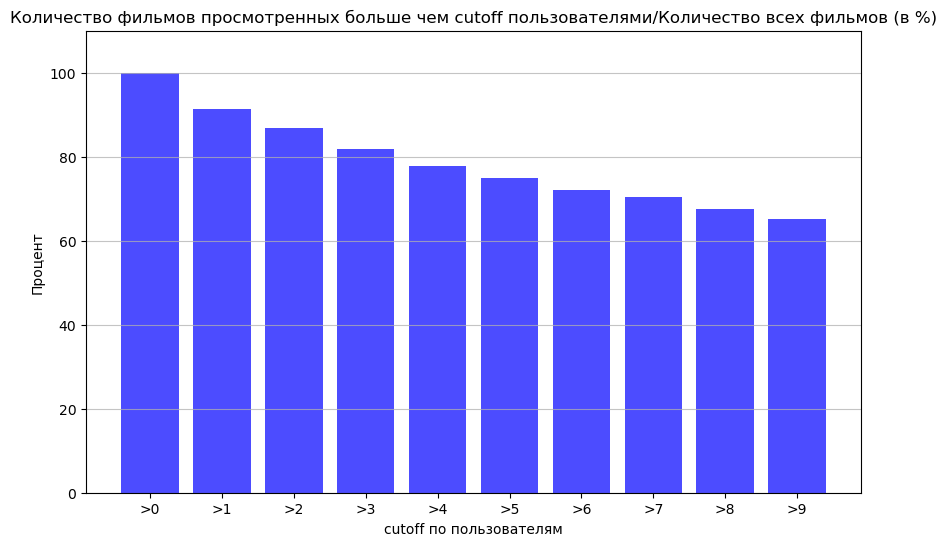

In [27]:
# Данные для гистограммы

# Преобразуем данные в проценты
percentages = [value * 100 for value in The_percentage_of_the_item_is_higher_than_cutoff]

# Индексы для каждого значения
indices = np.arange(len(percentages))

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.bar(indices, percentages, color='blue', alpha=0.7)

# Настройка заголовка и меток осей
plt.title('Количество фильмов просмотренных больше чем cutoff пользователями/Количество всех фильмов (в %)')
plt.xlabel('cutoff по пользователям')
plt.ylabel('Процент')

# Настройка меток по оси X
plt.xticks(indices, [f'>{i}' for i in indices])

# Показать гистограмму
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 110)  # Устанавливаем пределы по оси Y
plt.show()

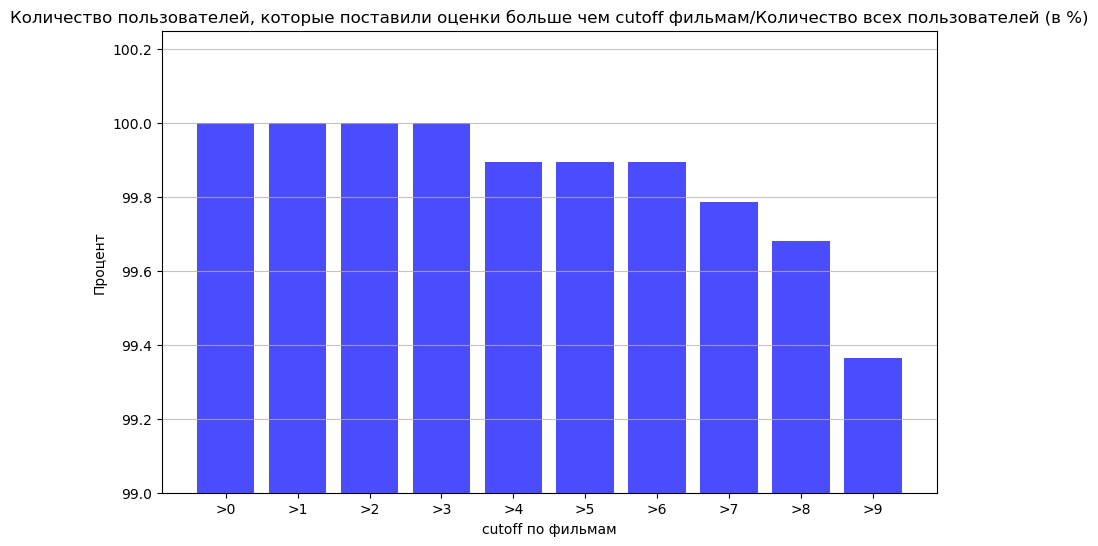

In [28]:
# Данные для гистограммы

# Преобразуем данные в проценты
percentages = [value * 100 for value in The_percentage_of_the_user_is_higher_than_cutoff]

# Индексы для каждого значения
indices = np.arange(len(percentages))

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.bar(indices, percentages, color='blue', alpha=0.7)

# Настройка заголовка и меток осей
plt.title('Количество пользователей, которые поставили оценки больше чем cutoff фильмам/Количество всех пользователей (в %)')
plt.xlabel('cutoff по фильмам')
plt.ylabel('Процент')

# Настройка меток по оси X
plt.xticks(indices, [f'>{i}' for i in indices])

# Показать гистограмму
plt.grid(axis='y', alpha=0.75)
plt.ylim(99, 100.25)  # Устанавливаем пределы по оси Y
plt.show()

#### Вывод:   
1) Берём всех пользователей, поскольку большинство из них (99,3%) поставило оценку более 10 фильмам    
2) Убираем фильмы, которые посмотрели <5 пользователей  

In [29]:
cutoff_item_counts_per_user = 4

filtered_item_ids = item_counts_per_user[item_counts_per_user > cutoff_item_counts_per_user].index

In [30]:
print(f"N users before: {interactions_df.user_id.nunique()}")
print(f"N items before: {interactions_df.item_id.nunique()}\n")

interactions_df = interactions_df[interactions_df.item_id.isin(filtered_item_ids)]

print(f"N users after: {interactions_df.user_id.nunique()}")
print(f"N items after: {interactions_df.item_id.nunique()}")

N users before: 943
N items before: 1650

N users after: 943
N items after: 1283


#### Добавим спарсенные данные к данных о фильмах

In [31]:
items_ohe_df = pd.merge(items_ohe_df,
         movie_data_add,
         on='item_id',how ='left')

In [32]:
print(items_ohe_df.shape)
items_ohe_df.head()

(1682, 66)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,Stars_Robin Williams,Stars_Jack Nicholson,Stars_Sylvester Stallone,Stars_Anthony Hopkins,Stars_Jean-Claude Van Damme,Stars_Michael J. Fox,Stars_Jim Carrey,Stars_Michael Keaton,Stars_Hugh Grant,Stars_Nicolas Cage
0,1,0.049583,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.049583,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.049583,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.049583,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.049583,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### После различных фильтраций оставим user и item которые есть во всех датасетах в таблицах:  
items_ohe_df - инфа про фильмы  
users_ohe_df - инфа про юзеров  
interactions_df - таблица взаимодействий  

После фильтрации может получиться так, что некоторые айтемы/юзеры есть в датасете взаимодействий, но при этом они отсутствуют в датасетах айтемов/юзеров или наоборот. Поэтому найдем id айтемов и id юзеров, которые есть во всех датасетах и оставим только их.

In [33]:
common_items = set(interactions_df.item_id.unique()).intersection(set(items_ohe_df.item_id.unique()))
common_users = set(interactions_df.user_id.unique()).intersection(set(users_ohe_df.user_id.unique()))

print("Кол-во общих пользователей: ", len(common_users))
print("Кол-во общих продуктов: ", len(common_items))

interactions_df = interactions_df[interactions_df.item_id.isin(common_items)]
interactions_df = interactions_df[interactions_df.user_id.isin(common_users)]

items_ohe_df = items_ohe_df[items_ohe_df.item_id.isin(common_items)]
users_ohe_df = users_ohe_df[users_ohe_df.user_id.isin(common_users)]

Кол-во общих пользователей:  943
Кол-во общих продуктов:  1283


#### Создадим uid и iid  
внутренние индексы для user_id и item_id по порядку от 0,1,2,3 и так далее  

Это делаетя для того, чтобы потом создать матрицу взаимодействий и чтобы uid и iid соответствовали столбцам матрицы  
Пояснение: user_id может быть 123123432532432, но у нас в матрице он будет всего лишь на 5232 месте по порядку

In [34]:
interactions_df["uid"] = interactions_df["user_id"].astype("category")
interactions_df["uid"] = interactions_df["uid"].cat.codes

interactions_df["iid"] = interactions_df["item_id"].astype("category")
interactions_df["iid"] = interactions_df["iid"].cat.codes

print(sorted(interactions_df.uid.unique())[:5])
print(sorted(interactions_df.iid.unique())[:5])
interactions_df.head()

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


,user_id,item_id,rating,timestamp,uid,iid
0,1,1,5,1997-09-22 22:02:38,0,0
1,1,2,3,1997-10-15 05:26:11,0,1
2,1,3,4,1997-11-03 07:42:40,0,2
3,1,4,3,1997-10-15 05:25:19,0,3
4,1,5,3,1998-03-13 01:15:12,0,4


### Итоговая матрица взаимодействий

In [35]:
# Создаем разреженную матрицу
num_users = len(common_users)
num_items = len(common_items)

# Получаем соответствующие user_ids и item_ids для создания матрицы
user_ids = interactions_df['uid']
item_ids = interactions_df['iid']
ratings = interactions_df['rating'].values

ui_matrix_Train = csr_matrix((ratings, # одномерный массив рейтингов
                              (user_ids, item_ids)), # (одномерный массив рейтингов uid,одномерный массив рейтингов iid)
                             shape=(num_users, num_items), # количество уникальных users, количество уникальных items
                             dtype=int)

interactions_vec = ui_matrix_Train.toarray()

In [36]:
# фактическая матрица
ratings_matrix = ui_matrix_Train.astype(float)

In [37]:
ratings_matrix = ratings_matrix.tocsr()  # Конвертация в CSR

In [38]:
# Проверим себя ещё раз
print(interactions_df.item_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(items_ohe_df.item_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(interactions_df.user_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(users_ohe_df.user_id.nunique()) # количество уникальных item_id в таблице взаимодействий

set(items_ohe_df.item_id.unique()) - set(interactions_df.item_id.unique())

1283
1283
943
943


set()

### Создание словарей id-шников   
Для того, чтобы можно было удобно превратять соответствие iid/uid в item_id/user_id и наоборот соберем словари 

{iid: item_id}, {uid: user_id} и {item_id: iid}, {user_id: uid}.

In [39]:
iid_to_item_id = interactions_df[["iid", "item_id"]].drop_duplicates().set_index("iid").to_dict()["item_id"]
item_id_to_iid = interactions_df[["iid", "item_id"]].drop_duplicates().set_index("item_id").to_dict()["iid"]

uid_to_user_id = interactions_df[["uid", "user_id"]].drop_duplicates().set_index("uid").to_dict()["user_id"]
user_id_to_uid = interactions_df[["uid", "user_id"]].drop_duplicates().set_index("user_id").to_dict()["uid"]

И проиндексируем датасеты users_ohe_df и items_ohe_df по внутренним айди:

In [40]:
items_ohe_df["iid"] = items_ohe_df["item_id"].apply(lambda x: item_id_to_iid[x])
items_ohe_df = items_ohe_df.set_index("iid")

users_ohe_df["uid"] = users_ohe_df["user_id"].apply(lambda x: user_id_to_uid[x])
users_ohe_df = users_ohe_df.set_index("uid")

## 2 Построение моделей

### 2.1 Двухэтапная модель

### 2.1.1 Первый этап. Коллаборативная фильтрация

### Краткое изложение всего большого пункта "2.1.1 Первый этап. Коллаборативная фильтрация" чтобы не читать много кода

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">    

**На этом этапе в результате получаю таблицы со столбцами при помощи различных методов: user_id, item_id, pred, rank**   
То есть для каждого пользователя для каждого фильма получаю rank от 1 до N (N - количество фильмов)   

Используются следующие методы:  

#### 2.1.1.1 SVD

Строим матрицу SVD (с параметром k=100)    
 
#### 2.1.1.2 Implicit KNN  

**scores = перемножаем вектор пользователя * матрицу схожестви фильмов и получаем вес (отсюда Ранг) для каждого фильма поэтому пользователю**  

1) Строим модель:  
Находим матрицу схожестви фильмов  
при K = 100 (задаём количество самых близких соседей, которых будем учитывать при рекомендации)  

2) Для каждого пользователя ищем N фильмов стоящих от 1 до N по рангу (в нашем случае для всех фильмов N = num_items)  

Используем такие расстояния как:   
1) Косинусное сходство    
2) **$bm25\ weight_{ij}$** - учитывающий 1) популярность фильма и 2) количество оценок пользователя, и уровень оценнки пользователя  
3) **tfidf_weight** - учитывающий 1) популярность фильма и 2) количество оценок пользователя, и уровень оценнки пользователя   

#### 2.1.1.3 ALS (Alternating Least Squares)     
#### 2.1.1.4 LightFM   

### 2.1.1.1 SVD

#### Теория

#### 1) Создаём матрицу, которую получили из элементов SVD разложения пониженной размерности.

Получаем эквивалентную матрицу такой же размерности (943, 1283):
$A \approx A_{New} = U \Sigma V^{T}$

1.1) Рассчитываем матрицу ATA (1283 × 1283)  

$ATA = A^{T}*A$ (если делаем $A*A^{T}$, то получим (943,943))  

1.2) Рассчитываем собственные значения и собственные вектора матрицы  

$Ф_{A}(λ) = |ATA-λE| = 0$  
$AV_{i} = λ_{i}V{i}$ ($V_{i}$≠0), $V_{i}$ - собственный вектор,    

1.3) Сортируем собственные вектора по собественным значениям в убывающем порядке  
1.4) Выбираем k собственных векторов, образуется новое k-мерное пространство  

1.5) Находим U через $A v_i = \sigma_i u_i$.   

$$
u_i = \frac{A v_i}{\sigma_i}
$$

где  
$$
\sigma_i = \sqrt{\lambda_i}
$$

Собираем $u_i$ в матрицу $U_k \in \mathbb{R}^{m \times k}$

**Итог:**    

$A \approx U \Sigma V^{T}$  

$U_k \in R^{m x k}$ - столбцы - собственные вектора делить на соответствующие собственные значения (0.2/$\sqrt{2.0}$)  
$V_k \in R^{n x k}$ - строки - собственные вектора, соотвественно $V^{T} = E^{T}$    
$\Sigma_k \in R^{k x k}$  - собственные значения под корнем по диагонали, остальные нули  

#### 2) Берём топ 100 фильмов для каждого  пользователя

Для каждого пользователя убираем фильмы, которые пользователь уже оценил берём топ 100 оценок из этих фильмов

In [41]:
from scipy.sparse.linalg import svds

In [42]:
# k - это количество сингулярных значений, которые нужно оставить (например, 100)
U, sigma, Vt = svds(ratings_matrix.toarray(), k=100)

In [43]:
print(interactions_vec.shape)
print(U.shape)

(943, 1283)
(943, 100)


In [44]:
# Восстанавливаем приближенную матрицу рейтингов
ratings_matrix_SVD = np.dot(U, np.dot(np.diag(sigma), Vt))
print(ratings_matrix.shape)
ratings_matrix_SVD[:5]

(943, 1283)


array([[ 4.32827111e+00,  1.50542901e+00,  1.39149626e+00, ...,
         5.31950557e-03,  9.70888366e-02,  2.97259238e-01],
       [ 3.29668794e+00,  1.99659388e-02, -1.99533391e-01, ...,
         3.32442235e-05, -5.76782651e-02, -5.22878752e-02],
       [-5.57099546e-01, -1.91725008e-01, -2.40215882e-01, ...,
         6.26954141e-02,  1.44848627e-02,  3.32648341e-02],
       [-1.59262093e-03,  8.31925294e-02,  7.74306394e-02, ...,
         1.02179586e-01,  6.97293531e-02,  1.77783641e-02],
       [ 1.86999763e+00,  6.53338629e-01,  2.36889175e-01, ...,
         8.99038328e-02,  2.60176592e-01,  1.32074615e-01]])

#### Для всех пользователей находим Ранг фильма для всех фильмов что есть

In [45]:
name_method = 'SVD'

# Количество фильмов, которые будем включать в топ
k = num_items  # или другое значение, если вам нужно меньше фильмов (сейчас у нас 1283) если хотим только топ 10 фильмов 
# для каждого  пользователя, то делаем k=10

# Словарь для хранения рекомендаций
user_recommendations = []

# Проходим по каждому пользователю
for user_id in range(num_users):
    # Предсказанные оценки для всех фильмов
    user_predicted_scores = ratings_matrix_SVD[user_id]

    # Находим индексы топ-фильмов по предсказанным оценкам
    top_indices = np.argsort(user_predicted_scores)[-k:][::-1]
    
    # Соответствующие id для этих фильмов
    top_movies_id = [iid_to_item_id[i] for i in top_indices]
    top_scores = user_predicted_scores[top_indices]
    
    list_per_user = list(map(list,zip(len(top_indices)*[user_id+1],
                               top_movies_id,
                               list(top_scores),
                                list(range(1,len(top_indices)+1)))))
    
    user_recommendations+=list_per_user
# Преобразуем результат в DataFrame
recommendations_df_SVD_ALL = pd.DataFrame(user_recommendations, columns = ['user_id',
                                                                           'item_id',
                                                                           'pred ' + name_method,
                                                                           'rank ' + name_method])

In [46]:
print(recommendations_df_SVD_ALL.shape)
recommendations_df_SVD_ALL.head()

(1209869, 4)


,user_id,item_id,pred SVD,rank SVD
0,1,15,6.272210,1
1,1,50,5.925379,2
2,1,269,5.607073,3
3,1,127,5.456930,4
4,1,9,5.436287,5


### 2.1.1.2 Implicit KNN

In [47]:
import implicit

In [48]:
# Пропишем ф-ию на вход которой подают модель и она возвращает пандас файл с user_id и top_movie_ids(список ids)

def result_table_by_KNN_method(model, name_method, num_users, N):

    # N - количество фильмов, которые будет выдавать в качестве рекомендаций для каждого пользователя
    
    # Пустой список для хранения рекомендаций для каждого пользователя
    recommendations_list = []
    
    user_id_list = []
    scores_list = []
    top_movie_ids_list = []
    rank_list = []
    # Проходим по каждому пользователю и получаем рекомендации
    for user_id in range(num_users):
        
        # Получаем топ рекомендаций для пользователя
        recommended_items, scores = model.recommend(user_id, ratings_matrix[user_id], N)

        user_id_list+= len(scores)*[user_id+1]
        top_movie_ids_list+= [iid_to_item_id[i] for i in recommended_items]
        scores_list+= list(scores)
        rank_list+=list(range(1,len(scores)+1))
    
    recommendations_list = list(map(list,zip(user_id_list,
                           top_movie_ids_list,
                           scores_list,
                           rank_list)))

    # Преобразуем результат в DataFrame
    recommendations_df_ALL = pd.DataFrame(recommendations_list, columns = ['user_id',
                                                                               'item_id',
                                                                               'pred ' + name_method,
                                                                               'rank ' + name_method])
    return recommendations_df_ALL

#### Теория

1) Рассчитываем матрицу сходства (similarity) между фильмами  

Если, фильмов у нас 50, пользователей 1000, значит вектор фильма будет состоять из 1000 компонент  

Между каждой парой фильмов (между каждой пары вектрово из 1000 компонент) рассчитываем расстояние  

Таким образом получаем matrix_similarity размером 50 на 50  

, где matrix_similarity[i][j] будет означать, насколько похожи i-ый и j-ый фильм,    

то есть каждое значение matrix_similarity[i][j] - расстояние между i-м и j-м фильмом   

Расстояние считаем одним из трёх способов:  

A) Cosine  
B) BM25  
C) TFIDF  


**В программе мы задаем K на уровне fit сразу, так сложилось исторически влияет на предварительные вычисления + K влияет на предварительные вычисления BM25 и В implicit эти модели часто кэшируют похожести предметов на этапе .fit()**  

2) У матрицы similarity оставляем только N самых больших значений, остальное зануляем, то есть если N = 2, то матрица будет такой:  

$sim\_matrix$ =   
[[1.  , 0.33, 0.  , 0.  , 0.  ],  
[0.  , 1.  , 0.  , 0.  , 0.57],  
[0.  , 0.  , 1.  , 0.33, 0.  ],  
[0.  , 0.  , 0.33, 1.  , 0.  ],  
[0.  , 0.57, 0.  , 0.  , 1.  ]]   

3) Формируем матрицу предсказанных рейтингов для фильма:  

$pred\_ui\_matrix[i][j] = \sum\limits_{j=1}^{n} {ui\_matrix\_Train[i][j]*sim\_matrix[i][j]}$  

**Пример:**  

Вектор пользователя:  
$ui\_matrix\_Train[0] = [0, 3, 0, 3, 3]$  

Матрица схожести фильмов:  

$sim\_matrix$ =  
[[1.   0.33 0.   0.   0.24]  
 [0.33 1.   0.29 0.29 0.57]  
 [0.   0.29 1.   0.33 0.32]  
 [0.   0.29 0.33 1.   0.32]  
 [0.24 0.57 0.32 0.32 1.  ]]   
 
$pred\_ui\_matrix[0][0] = 0*1+3*0.33*+0*0+3*0+3*0.24 = 1.71$  

Если перебрать все фильмы для данного пользователя, то получим следующий вектор:  
$pred\_for\_User\_0 = [1.734311808837787,\ 0,\ 2.853017566952774,\ 0,\ 0]$  

4) Зануляем те фильмы, которые пользователь уже оценил  
5) Берём топ K фильмов с самыми высокими значениями из матрицы $pred\_ui\_matrix$ и получаем топ K фильмов для рекомендации  

### 2.1.1.2.1 CosineRecommender

#### Косинусное сходство:  

$Cosine Similarity(A,B) = \frac{A*B}{||A||*||B||}$   

A⋅B — скалярное произведение векторов  
∥A∥ и ∥B∥ — длины (нормы) векторов.  

**Пример:**    
$Cosine Similarity([1,2,3],[4,5,6]) = \frac{1*4+2*5+3*6}{\sqrt{1^{2}+2^{2}+3^{2}}* \sqrt{4^{2}+5^{2}+6^{2}}}$  

In [49]:
K=100

cosine_model = implicit.nearest_neighbours.CosineRecommender(K)
cosine_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [50]:
N = num_items

recommendations_df_KNN_Cos_ALL = result_table_by_KNN_method(cosine_model, 'KNN_cos',num_users, N)
print(recommendations_df_KNN_Cos_ALL.shape)
recommendations_df_KNN_Cos_ALL.head()

(678823, 4)


,user_id,item_id,pred KNN_cos,rank KNN_cos
0,1,174,161.140696,1
1,1,56,145.999751,2
2,1,98,143.868371,3
3,1,69,137.824613,4
4,1,210,133.065561,5


### 2.1.1.2.2 BM25Recommender

#### Теория

Матрица similarity:  

**$bm25\ weight_{ij}$**  

Берём каждое значение матрицы user-item и при помощи различных коэффициентов  
1) **𝑙𝑒𝑛𝑔𝑡ℎ_𝑛𝑜𝑟𝑚** нормируем значение по юзеру (насколько часто и насколько большие баллы он ставил фильмам)  
2) **IDF** - Умножаем еще на долю оценок что получил фильм (Чем популярнее фильм (чем чаще его оценивают), тем меньше его IDF-вес)  

$bm25\ weight_{ij} = \frac{a[i][j]*(K1 +1)}{(K1*length\_norm[i] + a[i][j])}*IDF[j]$  

i - user   
j - movie  

**K1=100, B=0.75** - гипер параметры, отвечающие за влияние 𝑙𝑒𝑛𝑔𝑡ℎ_𝑛𝑜𝑟𝑚 на матрицу similarity  


**$IDF_{movie}$**

В широком смысле IDF - log(количество документов/количество документов со словом t)    

В нашем смысле - доля фильмов с оценками среди всех фильмов  

$IDF_{movie}$ - "логарифм от количества всех фильмов" - "логарифм от количества оценок в фильме, который пользователи оценили + 1" (колько пользователей оценили фильм j. Это просто количество ненулевых значений в столбце j матрицы a)  

количество оценок в фильме, пользователь оценил = количество ненулевых значений  

$IDF_{movie} = log(count\ all\ movies) - log(1+count\ of\ ratings\ in\ the\ movie\ that\ the\ user\ rated)$   

**Вычисление нормировки длины (length_norm)**

Конструкция (1-B) + B*() означает что на коэффициент B применяем нормировку, если B=0.75, значит применяем нормировку на 75%   

Смысл этой нормировки состоит в том, чтобы создать вектор с элементами схожего масштаба, где если юзер ставил много  оценок и они были большими то элемент нормировки будет большим, если мало и низкие оценки, то маленьким:

**Пример:**  

сумма оценко фильмов по каждому пользователю: [ 6 16  8  8 13]  
средяя этих оценок: 10.2  
вектор сумм оценок поделенный на среднее: array([0.69, 1.43, 0.84, 0.84, 1.21])   

$length\ norm\ user$ = (1-B) + B*(сумма всех оценок юзера)/(среднее от сумм оценок по всем юзерам)  

$length\ norm\ user = (1-B) +B * \frac{\sum\limits_{i=1}^{N}a_{i\ user}}{(\sum\limits_{i=1}^{N} \sum\limits_{j=1}^{M} a_{i\ j})\ /N}$  



In [51]:
K=100

BM25_model = implicit.nearest_neighbours.BM25Recommender(K)
BM25_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0010013580322265625 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [52]:
N = num_items

recommendations_df_KNN_BM25_ALL = result_table_by_KNN_method(BM25_model, 'KNN_BM25',num_users, N)
print(recommendations_df_KNN_BM25_ALL.shape)
recommendations_df_KNN_BM25_ALL.head()

(457236, 4)


,user_id,item_id,pred KNN_BM25,rank KNN_BM25
0,1,174,197731.239114,1
1,1,100,187858.482247,2
2,1,98,180658.460015,3
3,1,56,176595.145456,4
4,1,69,167594.616074,5


### 2.1.1.2.3 TFIDFRecommender

**1) tfidf_weight**   

Норимурем значения матрицы с учётом того сколько у фильма оценок

$IDF_{movie}$ - "логарифм от количества всех фильмов" - "логарифм от количества оценок в фильме, который пользователь оценил + 1"

иными словами:  
$IDF_{movie} = log(count\ all\ movies) - log(1+count\ of\ ratings\ in\ the\ movie\ that\ the\ user\ rated)$     

$tfidf\_weight\_matrix[i][j] = \sqrt{a[i][j]}*IDF[j]$  

a[i][j] - элементы матрицы user-movie (корень снижает влияние очень высоких оценок (сглаживает выбросы))  
i - user  
j - movie   

**2) normalize**   

Далее нормализуем возведя каждый элемент матрицы tfidf в квадрат и после чего ещё делим это значение на сумму всех элементов матрицы tfidf по соответствующему юзеру  
$normalize\_matrix[i][j] = \frac{tfidf\_weight\_matrix[i][j]^{2}}{sum(tfidf\_weight\_matrix[i])}$  

$tfidf\_weight\_matrix[i][j]^{2}$ - Усиливает влияние фильмов с высоким tfidf_weight (редкие и высокооценённые)   
$sum(tfidf\_weight\_matrix[i])$ - учитывает "долю вклада" фильма в профиль пользователя  

**3) Similarity matrix**  
$TFIDF\_model\_sim\_model = norm\_matrix*norm\_matrix.T$

In [53]:
K=100

TFIDF_model = implicit.nearest_neighbours.TFIDFRecommender(K)
TFIDF_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009922981262207031 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [54]:
N = num_items

recommendations_df_KNN_TFIDF_ALL = result_table_by_KNN_method(TFIDF_model,'KNN_TFIDF',num_users, N)
print(recommendations_df_KNN_TFIDF_ALL.shape)
recommendations_df_KNN_TFIDF_ALL.head()

(689343, 4)


,user_id,item_id,pred KNN_TFIDF,rank KNN_TFIDF
0,1,174,119.494093,1
1,1,69,108.484640,2
2,1,56,104.172755,3
3,1,98,100.984482,4
4,1,210,98.342824,5


### 2.1.1.3 ALS (Alternating Least Squares)  

In [55]:
from pyspark.sql import functions as F

#### Теория

Библиотека implicit позволяет эффективно работать с неявными данными, используя веса уверенности для каждого взаимодействия.

**явный рейтинг** - оценки от 1 до 5, например  
**неявный рейтинг** - наличие просмотра 1 - был просмотр, 0 - не было просмотра  

ALS — это стандартный алгоритм матричной факторизации, который работает с **явными рейтингами** (explicit ratings), когда пользователи явно оценивают предметы, например, дают оценки фильмам от 1 до 5.    

iALS — это модификация ALS, которая предназначена для работы с **неявными данными** (implicit data). Такие данные не содержат явных оценок, но включают информацию о взаимодействиях пользователей с предметами, например, просмотренные фильмы, купленные товары, прослушанные треки и т.д.  

**Алгоритм:**  
1) Раскладываем матрицу user-item на 2 матрицы  
2) Далее из этих 2-х матриц составляем начальную матрицу путём их произведения, это и есть искомая preiction матрица  
3) В этой матрице выбираем максимальные оценки для каждого пользователя  

Вот более детальный алогиртм:

**Как считаются матрицы X и Y?**  
**Итерационно обновляем матрицы X и Y**  

**Сам алгоритм:**  
1) Есть ф-я ошибки $L(X,Y)$, она < некого  порога? Да -> останавливаем пересчёт матриц X и Y, нет-> идём к пунктам ниже  
2) $x_{u}$ - пересчитываем матрицу по формуле ниже    
3) $y_{i}$ - пересчитываем матрицу по формуле ниже  
4) Возвращаемся к пункту 1 с обновлёнными матрицами X и Y  

$R_{m × n} ≈ X_{m × k}*Y^{T}_{k × n}$  


X — это матрица пользователей размером k×m  
𝑌 - это матрица айтемов размером k×n.   
k — это количество скрытых факторов.  
<br>   

**Функция ошибки:**    
### Правильная версия функции ошибки:

$$
L(X,Y) = \sum_{(u,i) \in \text{observed}} (r_{ui} - x_u^T y_i)^2 + \lambda \left( \sum_u \|x_u\|^2 + \sum_i \|y_i\|^2 \right)
$$

Здесь:

- $r_{ui}$ — это оценка пользователя $u$ для предмета $i$.
- $x_u^T y_i$ — скалярное произведение векторов пользователя и предмета.
- $\|x_u\|^2$ — это L2-норма для вектора $x_u$, которая представляет собой сумму квадратов всех элементов вектора $x_u$, т.е. $\|x_u\|^2 = \sum_k x_{uk}^2$.

Регуляризация применяется ко всем элементам матриц $X$ и $Y$, а не только к одной точке (то есть это суммирование по всем пользователям и предметам).
   
u,i - координатый матриц, u-пользователь, i - айтем    
λ - шаг  


**1 шаг:**  
<br>   
$\frac{∂L(X,Y)}{∂x_{u}}=0$    

$x_{u} = (Y_{k × n}Y_{k × n}^{T}+λE)^{-1}Y_{k × n}r_{u}$   

$r_{u}$ - вектор оценок пользователя  

Более подробно -  

#### Берём производную и приравниваем к нулю

Чтобы найти минимум $L(x_u)$, берём производную по $x_u$ и приравниваем к нулю:

$$
\frac{\partial L(x_u)}{\partial x_u} = -2 Y_{I_u}^T (r_u - Y_{I_u} x_u) + 2 \lambda x_u = 0
$$

Упрощаем:

$$
Y_{I_u}^T Y_{I_u} x_u + \lambda x_u = Y_{I_u}^T r_u
$$

Выносим $x_u$:

$$
(Y_{I_u}^T Y_{I_u} + \lambda E) x_u = Y_{I_u}^T r_u
$$

где $E$ — единичная матрица размером $k \times k$.   
$λx_{u} = λEx_{u}$- поскольку умножение на единичную матрицу не меняет вектор:

####  Решаем уравнение относительно $x_u$

Получаем:

$$
x_u = (Y_{I_u}^T Y_{I_u} + \lambda E)^{-1} Y_{I_u}^T r_u
$$

<br>  

**2 шаг:** 
<br>   
$\frac{∂L(X,Y)}{∂y_{i}}=0$  
$y_{i} = (X_{k × m}X_{k × m}^{T}+λE)^{-1}X_{k × m}r_{i}$  

$r_{i}$ - вектор оценок айтема   

**Пример:**  
u = 0 (id юзера), i = 0 (id пользователя), r_{ui} = 5 (оценка фильма)  
матрицы X и Y подбираются в процессе обучения и изначально они имеют какое-нибудь значение, пусть  

$X_{0} = [0.5, 0.3], Y_{0} = [0.3, 0.4]$

Значение ошибки $L(X,Y)$ для одной координаты ui:  
$L(X,Y)_{ui} = (r_{ui}-x^{T}_{u}y_{i})^{2}  + λ(|x_{u}^{2}| + |y_{i}^{2}|) = {(5 − 0.5⋅0.6+0.3⋅0.4)}^2 + 0.1*({∣0.5∣}^2+{∣0.6∣}^2+{∣0.3∣}^2+{∣0.4∣}^2)$   
и так мы считаем ошибку по всем координатам и складываем её, алгоритм продолжается до тех пор, пока не ошибка не станет ниже некого порога  

In [56]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS

# Создаём SparkSession
spark = SparkSession.builder \
    .appName("ALSExample") \
    .getOrCreate()

In [57]:
spark_df = spark.createDataFrame(interactions_df[['uid', 'iid', 'rating']])

In [58]:
als = ALS(userCol='uid', 
          itemCol='iid', 
          ratingCol='rating',
          implicitPrefs=False,  # Важно для явных рейтингов!
          coldStartStrategy='drop' # drop, означает что если на новой выборке появился новый user или item, то просто удалит
          # эту строчку из таблицы предсказаний
          # predictions = model.transform(test_data) - это таблица такого типа <class 'pyspark.sql.dataframe.DataFrame'>)  
          # к test_data добавит столбец "prediction" и будет, например, 3 столбца - uid, iid и prediction
         )
model_ALS = als.fit(spark_df)

In [59]:
all_user_item_combinations = spark_df.select('uid').distinct().crossJoin(
    spark_df.select('iid').distinct()
)

recommendations_df_ALS_ALL = model_ALS.transform(all_user_item_combinations)
recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.toPandas()

In [60]:
spark.stop()

In [61]:
print(recommendations_df_ALS_ALL.shape)
recommendations_df_ALS_ALL.head()

(1209869, 3)


,uid,iid,prediction
0,26,463,4.068698
1,29,463,3.690770
2,65,463,3.641177
3,19,463,1.576411
4,54,463,2.207388


#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [62]:
recommendations_df_ALS_ALL['user_id'] = recommendations_df_ALS_ALL['uid'].map(uid_to_user_id)
recommendations_df_ALS_ALL['item_id'] = recommendations_df_ALS_ALL['iid'].map(iid_to_item_id)

recommendations_df_ALS_ALL.drop(['uid', 'iid'], axis=1, inplace=True)
recommendations_df_ALS_ALL['pred ALS'] = recommendations_df_ALS_ALL['prediction']
recommendations_df_ALS_ALL.drop(['prediction'], axis=1, inplace=True)

recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.sort_values(['user_id', 'pred ALS'], ascending=[True, False])
recommendations_df_ALS_ALL['rank ALS'] = recommendations_df_ALS_ALL.groupby('user_id')['pred ALS'].rank(ascending=False, method='first').astype(int)

recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.reset_index(drop=True)

recommendations_df_ALS_ALL.head()

,user_id,item_id,pred ALS,rank ALS
0,1,1449,5.068420,1
1,1,169,4.724084,2
2,1,408,4.678136,3
3,1,114,4.657589,4
4,1,12,4.643006,5


### 2.1.1.4 LightFM

LightFM сочетает в себе два подхода:  

**Коллаборативная фильтрация:** Использует оценки пользователей для предсказания оценок других пользователей, основываясь на их сходстве.

**Контентная фильтрация:** Учитывает информацию о пользователях и предметах, используя их признаки (например, текстовое описание, жанр, категория и т. д.) для улучшения рекомендаций.  

Я применил logistic функцию для 0 и 1, а вообще здесь нужно применять другую ф-ю потерь

Основная идея что появляются матрицы **User-Feature** и **Item-Feature**  
Обучаем вектора для каждого отдельного признака  
Пользователя или объектов представляем как сумму объектов его признаков  

 **Модель одна, с разными loss:**    
 ● Logistic  
 ● Bayesian Personalized Ranking  
 ● Weighted Approximate-Rank Pairwise  
 ● k-os WARP  
 Обучается с помощью SGD. Доступны две вариации:  
 ● adagrad  
 ● adadelta  

$R_{pred} = σ(X⋅Y^{T} + b_{U} + b_{I})$ - матрица предсказаний, $b_{U} + b_{I}$ - вектора

$\hat{r}_{ui} ≈ σ(x_{u}⋅y_{i} + b_{u} + b_{i})$  

$\hat{r}_{ui}$ — оценка пользователя u   
$x_{u}$ — вектор признаков пользователя  
$y_{i}$ — вектор признаков предмета  
$x_{u}⋅y_{i}$ - простое скалярное произведение векторов  

$b_{u},b_{i}$  — смещения (bias) для пользователей и предметов соответственно. ($b_{u},b_{i}$ - числа)

$L(e^{u}, e^{I}, b^{u}, b^{I}) = П\ \hat{r}_{ui}⋅П\ (1-\hat{r}_{ui})$

$L(X,Y)  = \sum{(r_{ui}-x^{T}_{u}y_{i} - b_{u} - b_{i})^{2}} + λ(|x_{u}^{2}| + |y_{i}^{2}|)$   

In [63]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

from scipy.sparse import coo_matrix

C:\Users\Rinat\anaconda3\Lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [64]:
lfm_model = LightFM(no_components=64, learning_rate=0.05,loss='logistic', max_sampled=5, random_state=np.random.RandomState(50))
lfm_model.fit(ratings_matrix, epochs=15, num_threads=1)

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [65]:
N = num_items
name_method = 'LightFM'

recommendations_list = []

user_id_list = []
scores_list = []
top_movie_ids_list = []
rank_list = []

# Проходим по каждому пользователю (например, user_ids — это список ID пользователей)
for user_id in range(num_users):
    
    scores = lfm_model.predict(user_id, np.arange(num_items))
    top_items = np.argsort(scores)[-N:][::-1]
    top_movie_ids = [iid_to_item_id[i] for i in top_items]
    
    user_id_list+= len(top_indices)*[user_id+1]
    scores_list+= list(scores[top_items])
    top_movie_ids_list+= top_movie_ids
    rank_list+=list(range(1,len(scores)+1))

recommendations_list = list(map(list,zip(user_id_list,
                       top_movie_ids_list,
                       scores_list,
                       rank_list)))

# Преобразуем результат в DataFrame
recommendations_df_LightFM_ALL = pd.DataFrame(recommendations_list, columns = ['user_id',
                                                                           'item_id',
                                                                           'pred ' + name_method,
                                                                           'rank ' + name_method])

In [66]:
print(recommendations_df_LightFM_ALL.shape)
recommendations_df_LightFM_ALL.head()

(1209869, 4)


,user_id,item_id,pred LightFM,rank LightFM
0,1,50,5.185716,1
1,1,258,5.105276,2
2,1,286,5.097438,3
3,1,294,5.086987,4
4,1,288,5.065082,5


### 2.1.2 Второй этап. Улучшение модели ранжирования. LGBMRanker()

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">    

**Что делаем в этом подпункте?**  
1) Соединяем всевозможные данные из всех таблиц по всем комбинациям user_id и item_id в одну большую, чтобы далее признаки были одинаковыми и удобно было считать метрики.  
То есть, чтобы не было такого, что в Train есть столбец "occupation_writer" после one-hot-encoding, а в Test, его нет или наоборот  

Получаем таблицу **Big_Table**, у которой есть данные:  
1.1) Рейтинг  
1.2) Данные о пользователе  
1.3) Данные о фильме (в том числе спарсенные данные)  
1.4) Данные полученные моделями на первом этапе (Предсказания и Ранги)  

2) Обучаем модель LGBMRanker() на Train     

**Для трех типов данных:**    

2.1) список данных без предсказаний моделей из первого  этапа  
2.2) + данные с предсказаниями моделей из первого  этапа    
2.3)  + дополнительные данные по фильмам  

3) Рассчитаем предсказания (prediction) и ранги (rank) для всех user_id и item_id сразу для двух списков колонок (1 209 869 строк)   

#### 2.1.2.1 Строим большую таблицу Big_Table (1 209 869 строк), куда собираем всю информацию по всем возможным user_id и item_id  

Для каждого user_id и item_id  
1) Инфа взаимодействий  
2) Инфа о пользователе  
3) Инфа о продукте  
4) Инфа о результатах применения моделей (prediction и rank) 

Заготавливаем всевозможные варианты user_id - item_id

In [67]:
user_id_list = sorted(interactions_df.user_id.unique())
item_id_list = sorted(interactions_df.item_id.unique())

user_id_item_id_List = []
for user_id in user_id_list:
    for item_id in item_id_list:
        user_id_item_id_List.append([user_id,item_id])

Big_Table = pd.DataFrame(user_id_item_id_List,columns = ['user_id','item_id'])

Соединяем выборки Train и Test, создавая колонку Sample где будем указывать какая это выборка

In [68]:
data_Train['Sample'] = 'Train'
data_Test['Sample'] = 'Test'

data_All = pd.concat([data_Train, data_Test], ignore_index=True)
print(data_All.shape)
data_All.head()

(100000, 5)


,user_id,item_id,rating,timestamp,Sample
0,1,1,5,1997-09-22 22:02:38,Train
1,1,2,3,1997-10-15 05:26:11,Train
2,1,3,4,1997-11-03 07:42:40,Train
3,1,4,3,1997-10-15 05:25:19,Train
4,1,5,3,1998-03-13 01:15:12,Train


#### "Джоиним" все данные

**Данные:**    
1) rating  
2) Данные о филмье  
3) Данные о пользователе  

In [69]:
# join interraction info
Big_Table = pd.merge(Big_Table,
                     data_All[['user_id','item_id','rating','Sample']],
                     on=['user_id','item_id'], how='left')

Big_Table['Sample'] = Big_Table['Sample'].fillna('No interaction')

# join movie info
Big_Table = pd.merge(Big_Table,
                            items_ohe_df,
                            on='item_id', how='left')

# join user info
Big_Table = pd.merge(Big_Table,
                             user_data[['user_id','age','gender','occupation']],
                             on='user_id', how='left')

Big_Table = Big_Table.sort_values(by='user_id').reset_index(drop=True)
Big_Table = Big_Table.replace({'F': 0, 'M': 1})

Big_Table = pd.get_dummies(Big_Table, columns=['occupation'], dtype=int).reset_index(drop=True)

print(Big_Table.shape)
Big_Table.head()

C:\Users\Rinat\AppData\Local\Temp\ipykernel_7296\1645074079.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Big_Table = Big_Table.replace({'F': 0, 'M': 1})


(1209869, 92)


,user_id,item_id,rating,Sample,number of days after the release,unknown,action,adventure,animation,children,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,1,5.0,Train,0.049583,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,899,NaN,No interaction,0.023526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,898,NaN,No interaction,0.023526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,896,NaN,No interaction,0.023526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,895,NaN,No interaction,0.023526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Прикрепляем результаты моделей из 1-го этапа

In [70]:
print(recommendations_df_SVD_ALL.shape)
print(recommendations_df_KNN_Cos_ALL.shape)
print(recommendations_df_KNN_BM25_ALL.shape)
print(recommendations_df_KNN_TFIDF_ALL.shape)
print(recommendations_df_ALS_ALL.shape)
print(recommendations_df_LightFM_ALL.shape)

(1209869, 4)
(678823, 4)
(457236, 4)
(689343, 4)
(1209869, 4)
(1209869, 4)


In [71]:
# Начинаем с первого датафрейма и последовательно добавляем остальные
first_stage_result_df = recommendations_df_SVD_ALL

# Объединяем с каждым из других датафреймов по 'user_id' и 'item_id'
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_Cos_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_BM25_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_TFIDF_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_ALS_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_LightFM_ALL, on=['user_id', 'item_id'], how='outer')

# в столбцах pred у KNN заменяю пустоты на 0
Null_pred_columns = ['pred KNN_cos','pred KNN_BM25','pred KNN_TFIDF']
first_stage_result_df[Null_pred_columns] = first_stage_result_df[Null_pred_columns].fillna(0)

# Нормируем столбцы pred (val/(max-min))

first_stage_pred_columns = ['pred SVD', 'pred KNN_cos', 'pred KNN_BM25', 'pred KNN_TFIDF', 'pred ALS', 'pred LightFM']

for column in first_stage_pred_columns:
    max_val = first_stage_result_df[column].max()
    min_val = first_stage_result_df[column].min()
    # Нормируем значения столбца по формуле val/(макс-мин)
    first_stage_result_df[column] = first_stage_result_df[column].apply(
        lambda x: (x - min_val) / (max_val - min_val) if pd.notnull(x) else np.nan
    )

# В столбцах rank у KNN Заменяем пустоты на num_items = 1283

Null_rank_columns = ['rank KNN_cos', 'rank KNN_BM25', 'rank KNN_TFIDF']
first_stage_result_df[Null_rank_columns] = first_stage_result_df[Null_rank_columns].fillna(1283)

# Проверка итогового датафрейма
print(first_stage_result_df.shape)
first_stage_result_df.head()

(1209869, 14)


,user_id,item_id,pred SVD,rank SVD,pred KNN_cos,rank KNN_cos,pred KNN_BM25,rank KNN_BM25,pred KNN_TFIDF,rank KNN_TFIDF,pred ALS,rank ALS,pred LightFM,rank LightFM
0,1,1,0.676563,18,0.0,1109.0,0.0,739.0,0.0,1154.0,0.634387,280,0.727689,9
1,1,2,0.411240,104,0.0,1108.0,0.0,738.0,0.0,1153.0,0.547462,714,0.527072,277
2,1,3,0.400532,114,0.0,1107.0,0.0,737.0,0.0,1152.0,0.540144,748,0.494777,363
3,1,4,0.534054,52,0.0,1106.0,0.0,736.0,0.0,1151.0,0.603336,433,0.588730,138
4,1,5,0.391209,125,0.0,1105.0,0.0,735.0,0.0,1150.0,0.535768,774,0.490711,380


In [72]:
# Таблица Рангов
Big_rank_Table = first_stage_result_df[['user_id','item_id','rank SVD','rank KNN_cos','rank KNN_BM25','rank KNN_TFIDF','rank ALS','rank LightFM']].copy()
Big_rank_Table['rank KNN_cos'] = Big_rank_Table['rank KNN_cos'].astype(int)
Big_rank_Table['rank KNN_BM25'] = Big_rank_Table['rank KNN_BM25'].astype(int)
Big_rank_Table['rank KNN_TFIDF'] = Big_rank_Table['rank KNN_TFIDF'].astype(int)
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 8)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM
0,1,1,18,1109,739,1154,280,9
1,1,2,104,1108,738,1153,714,277
2,1,3,114,1107,737,1152,748,363
3,1,4,52,1106,736,1151,433,138
4,1,5,125,1105,735,1150,774,380


In [73]:
# Таблица pred
Big_pred_Table = first_stage_result_df.drop(columns=['rank SVD','rank KNN_cos','rank KNN_BM25','rank KNN_TFIDF','rank ALS','rank LightFM']).reset_index(drop=True)
print(Big_pred_Table.shape)
Big_pred_Table.head()

(1209869, 8)


,user_id,item_id,pred SVD,pred KNN_cos,pred KNN_BM25,pred KNN_TFIDF,pred ALS,pred LightFM
0,1,1,0.676563,0.0,0.0,0.0,0.634387,0.727689
1,1,2,0.411240,0.0,0.0,0.0,0.547462,0.527072
2,1,3,0.400532,0.0,0.0,0.0,0.540144,0.494777
3,1,4,0.534054,0.0,0.0,0.0,0.603336,0.588730
4,1,5,0.391209,0.0,0.0,0.0,0.535768,0.490711


In [74]:
print(Big_Table.shape)
print(Big_pred_Table.shape)

(1209869, 92)
(1209869, 8)


In [75]:
Big_Table = pd.merge(Big_Table, Big_pred_Table, on=['user_id', 'item_id'], how='outer')

In [76]:
print(Big_Table.shape)
Big_Table.head()

(1209869, 98)


,user_id,item_id,rating,Sample,number of days after the release,unknown,action,adventure,animation,children,...,occupation_scientist,occupation_student,occupation_technician,occupation_writer,pred SVD,pred KNN_cos,pred KNN_BM25,pred KNN_TFIDF,pred ALS,pred LightFM
0,1,1,5.0,Train,0.049583,0,0,0,1,1,...,0,0,1,0,0.676563,0.0,0.0,0.0,0.634387,0.727689
1,1,2,3.0,Train,0.049583,0,1,1,0,0,...,0,0,1,0,0.411240,0.0,0.0,0.0,0.547462,0.527072
2,1,3,4.0,Train,0.049583,0,0,0,0,0,...,0,0,1,0,0.400532,0.0,0.0,0.0,0.540144,0.494777
3,1,4,3.0,Train,0.049583,0,1,0,0,0,...,0,0,1,0,0.534054,0.0,0.0,0.0,0.603336,0.588730
4,1,5,3.0,Train,0.049583,0,0,0,0,0,...,0,0,1,0,0.391209,0.0,0.0,0.0,0.535768,0.490711


In [77]:
print(list(Big_Table.columns))

['user_id', 'item_id', 'rating', 'Sample', 'number of days after the release', 'unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western', 'Rating_imdb', 'voteCount', 'Budget', 'Gross worldwide', 'Runtime', 'Director_Alfred Hitchcock', 'Director_Woody Allen', 'Director_Rob Reiner', 'Director_Steven Spielberg', 'Director_Martin Scorsese', 'Director_Francis Ford Coppola', 'Director_James Cameron', 'Director_Stanley Kubrick', 'Director_Frank Capra', 'Director_Robert Stevenson', 'Director_Billy Wilder', 'Director_Oliver Stone', 'Director_Wes Craven', 'Director_Barry Levinson', 'Director_Robert Wise', 'Director_Tony Scott', 'Director_Vincente Minnelli', 'Director_Clint Eastwood', 'Director_Richard Donner', 'Director_Luc Besson', 'Stars_Robert De Niro', 'Stars_Cary Grant', 'Stars_Charlie Sheen', 'Stars_Harrison Ford', 'Stars_John Travolta', 'Sta

#### Делаем выборки с учителем для обучения моделей

In [78]:
# список данных без предсказаний моделей из первого  этапа
column_list_1 = ['number of days after the release','unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 
                 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 
                 'romance', 'sci_fi', 'thriller', 'war', 'western', 
                 'age', 'gender', 'occupation_administrator', 'occupation_artist', 
                 'occupation_doctor', 'occupation_educator', 'occupation_engineer', 'occupation_entertainment', 
                 'occupation_executive', 'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer', 
                 'occupation_librarian', 'occupation_marketing', 'occupation_none', 'occupation_other', 
                 'occupation_programmer', 'occupation_retired', 'occupation_salesman', 'occupation_scientist', 
                 'occupation_student', 'occupation_technician', 'occupation_writer']

# + данные с предсказаниями моделей из первого  этапа
column_list_2 = column_list_1 + ['pred SVD', 'pred KNN_cos', 'pred KNN_BM25', 'pred KNN_TFIDF', 'pred ALS', 'pred LightFM']

# + дополнительные данные по фильмам

column_list_3 = column_list_2 + ['Rating_imdb', 'voteCount', 'Budget', 'Gross worldwide', 'Runtime', 
                                 'Director_Alfred Hitchcock', 'Director_Woody Allen', 'Director_Rob Reiner', 
                                 'Director_Steven Spielberg', 'Director_Martin Scorsese', 'Director_Francis Ford Coppola',
                                 'Director_James Cameron', 'Director_Stanley Kubrick', 'Director_Frank Capra', 
                                 'Director_Robert Stevenson', 'Director_Billy Wilder', 'Director_Oliver Stone', 
                                 'Director_Wes Craven', 'Director_Barry Levinson', 'Director_Robert Wise', 
                                 'Director_Tony Scott', 'Director_Vincente Minnelli', 'Director_Clint Eastwood', 
                                 'Director_Richard Donner', 'Director_Luc Besson', 'Stars_Robert De Niro', 
                                 'Stars_Cary Grant', 'Stars_Charlie Sheen', 'Stars_Harrison Ford', 
                                 'Stars_John Travolta', 'Stars_Bruce Willis', 'Stars_Al Pacino', 'Stars_Woody Allen', 
                                 'Stars_Kevin Costner', 'Stars_Daniel Day-Lewis', 'Stars_Robin Williams', 
                                 'Stars_Jack Nicholson', 'Stars_Sylvester Stallone', 'Stars_Anthony Hopkins', 
                                 'Stars_Jean-Claude Van Damme', 'Stars_Michael J. Fox', 'Stars_Jim Carrey', 
                                 'Stars_Michael Keaton', 'Stars_Hugh Grant', 'Stars_Nicolas Cage']

In [79]:
data_Train_large = Big_Table[Big_Table['Sample']=='Train'].reset_index(drop=True)
data_Test_large = Big_Table[Big_Table['Sample']=='Test'].reset_index(drop=True)

In [80]:
group_ids = data_Train_large['user_id']

In [81]:
# Целевая переменная
Y_train = data_Train_large['rating'].values
Y_test = data_Test_large['rating'].values

# Признаки для column_list_1 
X_train_1 = data_Train_large[column_list_1].values
X_test_1 = data_Test_large[column_list_1].values

# Признаки для column_list_2 
X_train_2 = data_Train_large[column_list_2].values
X_test_2 = data_Test_large[column_list_2].values

# Признаки для column_list_3 
X_train_3 = data_Train_large[column_list_3].values
X_test_3 = data_Test_large[column_list_3].values

# Cоздаем группу
# Например, группируем по user_id для модели: lgb.LGBMRanker
group = data_Train_large.groupby('user_id')['item_id'].count().values

### LGBMRanker

LGBMRanker — это модель градиентного бустинга (LightGBM), оптимизированная для задач learning-to-rank (LTR). Она предсказывает порядок (релевантность) объектов, а не их точные значения  

## 1. Pairwise (Попарный подход) -->min

**Идея:** минимизировать количество ошибок в упорядочивании пар объектов.  
**Пример алгоритма:** *LambdaRank* (модификация LambdaMART).

### Математическая постановка

Пусть для запроса $q$ есть два документа:

$y$ - баллы фильмов от 1 до 5 (если же у нас отклики то это либо 1, либо 0)  

- $d_i$ с релевантностью $y_i$
- $d_j$ с релевантностью $y_j$

**Цель:** Найти **СКОРЫ** $s_1,..., s_N$ (для всех объектов), Чем выше score, тем выше объект поднимется в ранжированном списке => то есть чем выше score, тем ниже Rank  

**Для этого  мы:**  

Строим последовательность деревьев, как в бустинге, чтобы Найти **наилучшие скоры**  

**Вначале все скоры у нас равны 0**  

если $y_i > y_j$, то модель должна предсказать $s_i > s_j$,  
где $s_i, s_j$ — скоры модели (подбираются моделью во время обучения).  

### 1) Построим первое дерево:  

#### Функция потерь (Pairwise Loss)

Используется логистическая потеря для разницы скоров:

$$
L_{pairwise} = \sum_{(i,j) \in P} \log(1 + e^{-\sigma(s_i - s_j)}) \cdot |\Delta NDCG_{ij}|
$$

где:

- $P$ — множество всех пар $(i, j)$, где $y_i > y_j$,
- $\sigma$ — параметр масштабирования (обычно $\sigma = 1$, $\sigma$ - не сигмоида, а скалярный параметр)    
- $\Delta NDCG_{ij}$ — изменение метрики NDCG при перестановке $d_i$ и $d_j$.


#### Градиент в LambdaRank

Градиент функции потерь для документа $d_i$:  
Здесь 2 суммы, потому что разделили все пары на 2 группы i>j и j>i  

#### Для объекта $i$:

$$
\frac{\partial L}{\partial s_i} = - \frac{1}{1 + e^{\sigma(s_i - s_j)}} \cdot \sigma \cdot \Delta \text{NDCG}_{ij}
$$

#### Для объекта $j$:

$$
\frac{\partial L}{\partial s_j} = \frac{1}{1 + e^{\sigma(s_i - s_j)}} \cdot \sigma \cdot \Delta \text{NDCG}_{ij}
$$

**При помощи этих формул градиента, мы можем рассчитывать их для каждой пары объектов!**  

**используется CART:**  

Но вместо MSE используют $L_{pairwise}$    

**🔁 Что делает алгоритм на каждой итерации (кратко):**  

1) Вычисляет вклад каждой пары в потерю (Loss) через ΔNDCG.  

2) Считает **градиенты** для каждой пары объекта.  

3) Считает **градиенты** для каждого объекта на основе пар.  

4) Выбирает разбиение (сплит) с наименьшей MSE (или SSE) по **антиградиентам** (не самим градиентам).   

5) Обновляет предсказания (scores) для всех объектов с помощью дерева.  


### 2) Построим последующие деревья: score считается на основе деревьев   

$s_{i}$  = initial_score+ $ηTree_{1}(X_{i})$ + $ηTree_{2}(X_{i})$ + $ηTree_{3}(X_{i})$ + ...  

Делаем тоже самое, но уже теперь **СКОРЫ** $s_1,..., s_N$ будуте не равны **0**, а скоры уже будут новыми, которые получились как $s_{i}$  = initial_score+ $ηTree_{1}(X_{i})$  

$$  
s_i^{(t)} = s_i^{(t-1)} + \eta \cdot \text{Tree}_t(X_i)  
$$  

**В обычном GBDT:**  
Tree₂ учится на y_true - Tree₁(X).

**В LGBMRanker:**  
Tree₂ учится на лямбдах, которые зависят от:  

Текущих скоров всех объектов (s_i),  

Их релевантностей (y_i),  

Метрики ранжирования (ΔNDCG).  

Это более сложная зависимость, чем просто разница y_true - y_pred.  

### Развёрнуто на одном примере:  

### 1) Построим первое дерево:   

**Есть такие данные**  

| Фильм | Runtime | Votes | y (релевантность) |
|-------|---------|-------|-------------------|
| A     | 90      | 100   | 1                 |
| B     | 110     | 200   | 3                 |
| C     | 100     | 150   | 2                 |
| D     | 120     | 250   | 2                 |
| E     | 95      | 180   | 3                 |

### Шаг 1: Считаю ΔNDCG для каждой пары  

Пары между объектами с одинаковым y не учитываются, поэтому пар не 10 (всевозможные), а всего 8  

| Пара   | Условие сравнения        | ΔNDCG   |
|--------|--------------------------|---------|
| (B, A) | $y_B = 3 > y_A = 1$      | 2.3476  |
| (E, A) | $y_E = 3 > y_A = 1$      | 1.8016  |
| (B, C) | $y_B = 3 > y_C = 2$      | 0.2564  |
| (E, C) | $y_E = 3 > y_C = 2$      | 0.2564  |
| (B, D) | $y_B = 3 > y_D = 2$      | 0.1805  |
| (E, D) | $y_E = 3 > y_D = 2$      | 0.1805  |
| (C, A) | $y_C = 2 > y_A = 1$      | 0.7278  |
| (D, A) | $y_D = 2 > y_A = 1$      | 0.5527  |    

### 2 Считаю градиенты для каждой пары:

$$
s_A = s_B = s_C = s_D = s_E = 0
$$


#### Для объекта $i$:

$$
\frac{\partial L}{\partial s_i} = - \frac{1}{1 + e^{\sigma(s_i - s_j)}} \cdot \sigma \cdot \Delta \text{NDCG}_{ij}
$$

#### Для объекта $j$:

$$
\frac{\partial L}{\partial s_j} = \frac{1}{1 + e^{\sigma(s_i - s_j)}} \cdot \sigma \cdot \Delta \text{NDCG}_{ij}
$$


При $\sigma = 1$ и $s_i = s_j = 0$:


**В некоторых реализациях (например, в оригинальном LambdaMART) градиенты для пары (i,j) и (j,i) могут складываться, что даёт множитель 2**

$$
\frac{\partial L}{\partial s_i} = - \frac{2 \cdot \Delta \text{NDCG}_{ij}}{2}
$$

$$
\frac{\partial L}{\partial s_j} = \frac{2 \cdot \Delta \text{NDCG}_{ij}}{2}
$$

### Пример расчёта для пары (B, A):

$$
\frac{\partial L}{\partial s_B} = - \frac{2.3476}{2} = -1.1738
$$

$$
\frac{\partial L}{\partial s_A} = \frac{2.3476}{2} = 1.1738
$$


### Шаг 3: Суммируем градиенты для каждого объекта

| Фильм | Суммарный градиент ($g_i$) |
|-------|----------------------------|
| A     | 1.1738 + 0.9008 + 0.3639 + 0.27635 = **2.71485** |
| B     | -1.1738 - 0.1282 - 0.09025 = **-1.39225** |
| C     | 0.1282 + 0.1282 - 0.3639 = **-0.1075** |
| D     | 0.09025 + 0.09025 - 0.27635 = **-0.09585** |
| E     | -0.9008 - 0.1282 - 0.09025 = **-1.11925** |


### Шаг 4: Считаем CART для каждого разбиения  

### Расчёт MSE

На уровне **алгоритма ранжирования (LambdaRank)** мы оптимизируем NDCG через лямбды.  

На уровне **построения одного дерева LightGBM** минимизирует MSE между предсказанными значениями и этими лямбдами.  

Другими словами тоже самое:  

На верхнем уровне алгоритм оптимизирует NDCG, чтобы улучшить качество ранжирования.  

Но под капотом он строит регрессионные деревья, и для этого нужен "таргет" — им и выступают лямбды, т.е. градиенты.  

То есть мы строим обычное дерево с MSE (задача Регрессии), но где target - это градиенты  

**Если Votes ≥ 150:**

- **Левая ветвь (Votes < 150):** только фильм A → средний **анти**градиент = **-2.71485**.


- **Правая ветвь (Votes ≥ 150):** B, C, D, E → средний антиградиент =  
  $\frac{1.39225 + 0.1075 + 0.09585 + 1.11925}{4} \approx 0.6787$  

**MSE (Mean Squared Error)** — это средняя квадратичная ошибка между предсказаниями дерева и целевыми антиградиентами. Формула:

$$
\text{MSE} = \frac{1}{N} \sum_{k=1}^{N} (\hat{y}_k - g_k)^2
$$

где:
- $\hat{y}_k$ — предсказание модели для объекта $k$,
- $g_k$ — антиградиент (целевое значение) для объекта $k$.

---

**Для левой ветви (A):**

$$
(\hat{y}_A - g_A)^2 = (-2.71485 - (-2.71485))^2 = 0
$$

---

**Для правой ветви (B, C, D, E):**

$$
(\hat{y}_B - g_B)^2 = (0.6787 - 1.39225)^2 = (-0.71355)^2 = 0.509
$$

$$
(\hat{y}_C - g_C)^2 = (0.6787 - 0.1075)^2 = (0.5712)^2 = 0.326
$$

$$
(\hat{y}_D - g_D)^2 = (0.6787 - 0.09585)^2 = (0.58285)^2 = 0.340
$$

$$
(\hat{y}_E - g_E)^2 = (0.6787 - 1.11925)^2 = (-0.44055)^2 = 0.194
$$

---

**Сумма квадратов ошибок (SSE):**

$$
\text{SSE} = 0 + 0.509 + 0.326 + 0.340 + 0.194 = 1.369
$$

---

**Среднее MSE (для 5 объектов):**

$$
\text{MSE} = \frac{1.369}{5} \approx 0.2738
$$

---

⚠️ *В LightGBM MSE обычно считается как SSE (без деления на количество объектов), поэтому в расчётах оптимизации используется значение **1.369***.
  
  
### Шаг 5: Расчёт новых предсказаний:

- $s_A = 0 + 0.1 \cdot (-2.71485) = -0.271485$
- $s_B = 0 + 0.1 \cdot 0.6787 = 0.06787$
- $s_C = 0 + 0.1 \cdot 0.6787 = 0.06787$
- $s_D = 0 + 0.1 \cdot 0.6787 = 0.06787$
- $s_E = 0 + 0.1 \cdot 0.6787 = 0.06787$  

### 2) Построим второе дерево:     

Делаем все тоже самое абсолютно что и при построении первого дерева, но уже с другими начальными **СКОРАМИ**   

## 2. Listwise (Списковый подход) -->min

**Идея:** оптимизировать метрики качества (например, NDCG) на всём списке объектов сразу.  
**Пример алгоритма:** *RankXENDCG* (аппроксимация NDCG).

---

### Функция потерь (Listwise Loss)

NDCG (Normalized Discounted Cumulative Gain):

$$
NDCG@k = \frac{1}{Z} \sum_{i=1}^{k} \frac{2^{y_i} - 1}{\log_2(i + 1)}
$$

где $Z$ — нормализация для идеального порядка.

---

### RankXENDCG Loss

Аппроксимирует NDCG через ожидаемый NDCG:

$$
L_{listwise} = -\sum_{i=1}^{N} y_i \cdot \mathbb{E}_\pi \left[ \frac{1}{\log_2(1 + \pi(i))} \right]
$$

где:

- $\pi$ — перестановка документов,
- $\mathbb{E}_\pi$ — матожидание по всем перестановкам,
- $y_i$ — релевантность документа.

---

### Упрощённая версия (Softmax + NDCG)

Предсказанные скоры $s_i$ преобразуются в вероятности через softmax:

$$
p_i = \frac{e^{s_i}}{\sum_{j=1}^{N} e^{s_j}}
$$

Функция потерь:

$$
L = -\sum_{i=1}^{N} \frac{2^{y_i} - 1}{\log_2(i + 1)} \cdot p_i
$$

### Функция Softmax

**🔁 Что делает алгоритм на каждой итерации (кратко):**  

1) Рассчет $P_y(i)$ (считается один раз для всех деревьев)  

$
P(y_i) = \frac{e^{y_i}}{\sum_{j} e^{y_j}}
$

2) Рассчет $P_s(i)$

$
P_s(i) = \frac{e^{s_i}}{\sum_{j} e^{s_j}}
$

3) Вычисление градиентов для Listwise подхода

$\frac{\partial L}{\partial s_i} = P_s(i) - P_y(i)$


4) Выбирает разбиение (сплит) с наименьшей MSE (или SSE) по **антиградиентам** (не самим градиентам).  

5) Обновляет предсказания (scores) для всех объектов с помощью дерева.  

#### Подробоно первые 3 шага

#### Шаг 1 Рассчет $P_y(i)$  

Функция softmax преобразует вектор действительных чисел в вероятностное распределение:

$$
P(y_i) = \frac{e^{y_i}}{\sum_{j} e^{y_j}}
$$

#### Пример
Для \( y = [1, 3, 2, 2, 3] \):

- Экспоненты:
  $$ e^1 \approx 2.72 $$
  $$ e^2 \approx 7.39 $$
  $$ e^3 \approx 20.09 $$

- Сумма экспонент:
  $$ e^1 + e^3 + e^2 + e^2 + e^3 \approx 2.72 + 20.09 + 7.39 + 7.39 + 20.09 \approx 57.68 $$

- Вероятности (softmax):
  $$ P_y(i) = \frac{e^{y_i}}{\sum_j e^{y_j}} $$
  Например, для объекта с \( y = 3 \):
  $$ P_y = \frac{20.09}{57.68} \approx 0.348 $$

Тогда:

- $P(A) = \frac{e^1}{e^1 + e^3 + e^2 + e^2 + e^3} \approx 0.047$  
- $P(B) = \frac{e^3}{\dots} \approx 0.348$  
- $P(C) = \frac{e^2}{\dots} \approx 0.128$  
- $P(D) = \frac{e^2}{\dots} \approx 0.128$  
- $P(E) = \frac{e^3}{\dots} \approx 0.348$  

#### Итоговые корректные значения:

Фильм | y | eʸ | P(y)
--- | --- | --- | ---
A | 1 | 2.72 | 0.047
B | 3 | 20.09 | 0.348
C | 2 | 7.39 | 0.128
D | 2 | 7.39 | 0.128
E | 3 | 20.09 | 0.348

**Сумма вероятностей:**  
$0.047 + 0.348 + 0.128 + 0.128 + 0.348 = 1$

### Шаг 2 Рассчет $P_s(i)$  

#### Текущие предсказания модели:
- $s_A = -0.271485$
- $s_B = 0.06787$
- $s_C = 0.06787$
- $s_D = 0.06787$
- $s_E = 0.06787$

#### Расчёт $P_s$ через softmax:
$$
P_s(i) = \frac{e^{s_i}}{\sum_{j} e^{s_j}}
$$

1. Вычисляем экспоненты:
   - $e^{s_A} = e^{-0.271485} \approx 0.762$
   - $e^{s_B} = e^{0.06787} \approx 1.070$
   - $e^{s_C} = e^{0.06787} \approx 1.070$
   - $e^{s_D} = e^{0.06787} \approx 1.070$
   - $e^{s_E} = e^{0.06787} \approx 1.070$

2. Сумма экспонент:
   $$ 0.762 + 1.070 + 1.070 + 1.070 + 1.070 \approx 5.042 $$

3. Вероятности $P_s$:
   - $P_s(A) = \frac{0.762}{5.042} \approx 0.151$
   - $P_s(B) = \frac{1.070}{5.042} \approx 0.212$
   - $P_s(C) = \frac{1.070}{5.042} \approx 0.212$
   - $P_s(D) = \frac{1.070}{5.042} \approx 0.212$
   - $P_s(E) = \frac{1.070}{5.042} \approx 0.212$

#### Итоговые значения:

| Фильм | $s_i$         | $e^{s_i}$ | $P_s(i)$ |
|-------|---------------|-----------|----------|
| A     | $-0.271485$   | $0.762$   | $0.151$  |
| B     | $0.06787$     | $1.070$   | $0.212$  |
| C     | $0.06787$     | $1.070$   | $0.212$  |
| D     | $0.06787$     | $1.070$   | $0.212$  |
| E     | $0.06787$     | $1.070$   | $0.212$  |

**Сумма вероятностей:**  
$0.151 + 0.212 \times 4 = 1$ 

### Шаг 3 Вычисление градиентов для Listwise подхода

Формула градиента для каждого объекта:
$$
\frac{\partial L}{\partial s_i} = P_s(i) - P_y(i)
$$

#### Градиенты Listwise подхода

| Фильм | $P_s$ | $P_y$ | Градиент $\nabla$ |
|-------|-------|-------|-------------------|
| A     | 0.151 | 0.047 | +0.104            |
| B     | 0.212 | 0.348 | -0.136            | 
| C     | 0.212 | 0.128 | +0.084            |
| D     | 0.212 | 0.128 | +0.084            |
| E     | 0.212 | 0.348 | -0.136            |

Формула: $\frac{\partial L}{\partial s_i} = P_s(i) - P_y(i)$

#### Пояснения:
1. $P_s(i)$ - текущее предсказанное распределение (softmax от $s_i$)
2. $P_y(i)$ - целевое распределение (softmax от $y_i$)
3. Градиент показывает направление корректировки предсказаний:
   - Положительный: нужно увеличить $s_i$
   - Отрицательный: нужно уменьшить $s_i$

## Сравнение подходов

| Критерий     | Pairwise (LambdaRank)       | Listwise (RankXENDCG)                |
|--------------|------------------------------|--------------------------------------|
| Оптимизация  | Попарные сравнения           | Весь список документов               |
| Сложность    | $O(n^2)$                     | $O(n \log n)$                        |
| Точность     | Хорошо работает в большинстве случаев | Точнее, но требует больше ресурсов |
| Использование| LightGBM (по умолчанию)      | Опционально в LightGBM (rank_xendcg) |


**На практике:**  

LambdaMART (гибридный подход) сочетает преимущества Pairwise и Listwise за счёт лямбд, учитывающих ΔNDCG.

MART (Multiple Additive Regression Trees)   

LightGBM (LGBMRanker) использует Pairwise-подход, но с элементами Listwise через метрики.

**Вывод**  

Pairwise — простой и надёжный, но не всегда оптимальный.

Listwise — точный, но сложный.

LambdaMART — золотая середина, поэтому популярен в промышленности.

In [82]:
import os
os.environ["LIGHTGBM_USE_DASK"] = "0"  # отключить интеграцию с dask
import lightgbm as lgb

#### Обучаем модель на данных без предсказаний 1-го этапа

In [83]:
%%time 

# Обучаем 1-ую модель
lgbm_model_1 = lgb.LGBMRanker()
lgbm_model_1.fit(
    X_train_1, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_1, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 42
CPU times: total: 4.95 s
Wall time: 1.84 s


LGBMRanker()

#### + предсказаниями 1-го этапа

In [84]:
%%time

# Обучаем 2-ую модель
lgbm_model_2 = lgb.LGBMRanker()
lgbm_model_2.fit(
    X_train_2, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_2, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 45
CPU times: total: 5.86 s
Wall time: 1.53 s


LGBMRanker()

#### + доп данные по фильмам

In [85]:
%%time

# Обучаем 3-ью модель
lgbm_model_3 = lgb.LGBMRanker()
lgbm_model_3.fit(
    X_train_3, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_3, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 90
CPU times: total: 6.92 s
Wall time: 1.79 s


LGBMRanker()

### Рассчитаем предсказания для всех user_id и item_id сразу для двух списков колонок

In [86]:
predictions_LGBMRanker_1 = lgbm_model_1.predict(Big_Table[column_list_1])
predictions_LGBMRanker_2 = lgbm_model_2.predict(Big_Table[column_list_2])
predictions_LGBMRanker_3 = lgbm_model_3.predict(Big_Table[column_list_3])

recommendations_df_LGBMRanker_ALL = Big_Table[['user_id','item_id']].copy()
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_1'] = list(predictions_LGBMRanker_1)
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_2'] = list(predictions_LGBMRanker_2)
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_3'] = list(predictions_LGBMRanker_3)

In [87]:
print(recommendations_df_LGBMRanker_ALL.shape)
recommendations_df_LGBMRanker_ALL.head()

(1209869, 5)


,user_id,item_id,pred LGBMRanker_1,pred LGBMRanker_2,pred LGBMRanker_3
0,1,1,0.043250,0.023559,0.367046
1,1,2,-1.161420,-3.646704,-3.612173
2,1,3,-1.139907,-3.779366,-3.676170
3,1,4,-0.852132,-2.249727,-2.055639
4,1,5,-0.384723,-3.995251,-3.945707


#### Зная prediction рассчитаем rank

In [88]:
# Сначала отсортируем DataFrame по user_id и по значению предсказания pred LGBMRanker_1 (по убыванию)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_1'], ascending=[True, False]
)

# Добавим столбец rank LGBMRanker_1, где каждое значение будет ранжировано от 1 до 1283 по каждому user_id
recommendations_df_LGBMRanker_ALL['rank LGBMRanker_1'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_1'].rank(
    method='first', ascending=False
).astype(int)

# Повторим для второго ранкера (pred LGBMRanker_2)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_2'], ascending=[True, False]
)

recommendations_df_LGBMRanker_ALL['rank LGBMRanker_2'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_2'].rank(
    method='first', ascending=False
).astype(int)


# Повторим для третьего ранкера (pred LGBMRanker_3)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_3'], ascending=[True, False]
)

recommendations_df_LGBMRanker_ALL['rank LGBMRanker_3'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_3'].rank(
    method='first', ascending=False
).astype(int)


#### сделаем индексы таблицы по порядку
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.reset_index(drop=True)

In [89]:
# Выведем результат для проверки
print(recommendations_df_LGBMRanker_ALL.shape)
recommendations_df_LGBMRanker_ALL[['user_id', 'item_id', 'pred LGBMRanker_1', 'rank LGBMRanker_1', 'pred LGBMRanker_2', 'rank LGBMRanker_2','pred LGBMRanker_3', 'rank LGBMRanker_3']].head()

(1209869, 8)


,user_id,item_id,pred LGBMRanker_1,rank LGBMRanker_1,pred LGBMRanker_2,rank LGBMRanker_2,pred LGBMRanker_3,rank LGBMRanker_3
0,1,50,1.511417,2,5.025289,2,5.453768,1
1,1,1449,-0.418457,507,5.397693,1,5.282075,2
2,1,127,1.154385,8,4.761271,3,4.859253,3
3,1,1388,-0.229117,358,3.856323,4,3.854249,4
4,1,1375,-0.142925,300,2.463725,17,3.222610,5


In [90]:
Big_rank_Table = pd.merge(Big_rank_Table, recommendations_df_LGBMRanker_ALL[['user_id', 'item_id','rank LGBMRanker_1', 'rank LGBMRanker_2', 'rank LGBMRanker_3']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 11)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3
0,1,1,18,1109,739,1154,280,9,165,117,112
1,1,2,104,1108,738,1153,714,277,1046,670,674
2,1,3,114,1107,737,1152,748,363,1031,685,683
3,1,4,52,1106,736,1151,433,138,794,454,426
4,1,5,125,1105,735,1150,774,380,444,714,718


## 2.2 NMF and dssm

### Краткое описание пункта 2.2 NMF and dssm

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;"   
 
Краткое описание:  
     
1) В этом пункте я строю 2 dssm модели для  
1.1) без спарсенных данных о фильмах   
1.2) со спарсенными даннными о фильмах   

2) Описываю теорию Triplet loss и архитектуру модели  
3) В результате получаю Ранги для всех 943 пользователей для всех 1282 фильов  

In [91]:
import ast
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from random import randint, random
from scipy.sparse import coo_matrix, hstack
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.models import Model
from tqdm import tqdm

from sklearn.metrics.pairwise import euclidean_distances as ED

# DSSM starter's pack

### Определим следующие  компоненты для построения модели:  
1) функция потерь  
2) генератор  
3) архитектура модели  

In [92]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

### 2.2.1 Функция потерь   

**!!! Тут нет явного обучения на подобии y_true - y_pred, вместо этого мы сами определяем что такое позитивный фильм и что такое негативный и уже после этого считем loss**

### Triplet loss

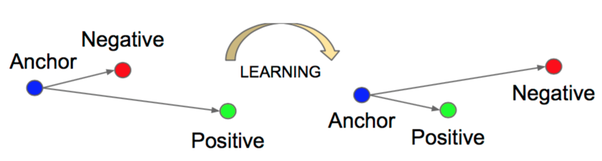

$pos\_dist = \sum(user2vec(U)-user2vec(P))$  - расстояние между вектором user и вектором хорошего фильма   
$neg\_dist = \sum(user2vec(U)-user2vec(N))$ - расстояние между вектором user и вектором плохого фильма   
$basic\_loss = pos\_dist - neg\_dist + alpha$  
$loss = K.maximum(basic\_loss, 0.0)$    

Таким образом минимизируем расстояние между вектором пользователя и вектором хорошего фильма и максимизируем расстояние между вектором пользователя и вектором плохого фильма    

In [93]:
def triplet_loss(user_emb, pos_emb, neg_emb, margin=1.0):
    pos_scores = torch.sum(user_emb * pos_emb, dim=1)
    neg_scores = torch.sum(user_emb * neg_emb, dim=1)
    losses = torch.relu(neg_scores - pos_scores + margin)
    return losses.mean()

**Эквивалентна:**  
    
F.margin_ranking_loss(  
    pos_scores,   
    neg_scores,   
    target=torch.ones_like(pos_scores),   
    margin=margin  
)  

### MarginRankingLoss

**Определение:**  

**MarginRankingLoss** — это частный случай Triplet Loss, где вместо явной тройки (anchor, positive, negative) используется сравнение двух пар (pos_score, neg_score) с заданным отступом (margin)  

**В torch:**  
nn.MarginRankingLoss(margin=1.0)  

**Формула:**  
max(0, -target * (pos_score - neg_score) + margin)   

**target:**  

target=1 → Требуем, чтобы pos_scores > neg_scores.  

target: Почти всегда 1 в рекомендательных системах. Меняется, если логика задачи иная (например, при сравнении двух негативных примеров).


**margin:**    
margin=1.0 → Задаём минимальный отступ между ними

**Пример для margin=1.0 и target=1.0:**    

pos_scores = 3.0, neg_scores = 1.5 → loss = max(0, - (3.0 - 1.5) + 1.0) = 0 (разница 1.5 > margin 1.0).

pos_scores = 2.0, neg_scores = 1.8 → loss = max(0, - (2.0 - 1.8) + 1.0) = 0.8 (разница 0.2 < margin 1.0)

### 2.2.2 generator

Создадим генератор, чтобы он случайно выбирал "хороший" и "плохой" фильм для пользователя

In [94]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

class RecommendationDataset(Dataset):
    def __init__(self, interactions, users_df, items_df, pos_threshold=4, neg_threshold=2):
        """
        Args:
            interactions: np.array shape (n_users, n_items) с рейтингами 1-5 (0 = нет взаимодействия)
            users_df: DataFrame с фичами пользователей (n_users, user_feature_dim)
            items_df: DataFrame с фичами айтемов (n_items, item_feature_dim)
            pos_threshold: рейтинг, начиная с которого айтем считается позитивным
            neg_threshold: рейтинг, ниже которого айтем считается негативным
        """
        self.interactions = interactions
        self.users_df = users_df
        self.items_df = items_df
        self.pos_threshold = pos_threshold
        self.neg_threshold = neg_threshold
        
        # Предварительно собираем списки позитивных/негативных айтемов для каждого пользователя
        self.user_pos_items = []
        self.user_neg_items = []
        
        for user_id in range(interactions.shape[0]):
            rated_items = np.where(interactions[user_id] > 0)[0]
            
            # Позитивные айтемы (оценка >= pos_threshold)
            pos_items = np.where(interactions[user_id] >= pos_threshold)[0]
            self.user_pos_items.append(pos_items)
            
            # Негативные айтемы (оценка <= neg_threshold или не оцененные)
            neg_items = np.where((interactions[user_id] > 0) & (interactions[user_id] <= neg_threshold))[0]
            if len(neg_items) == 0:
                # Если нет низких оценок, берем неоцененные
                neg_items = np.where(interactions[user_id] == 0)[0]
            self.user_neg_items.append(neg_items)
    
    def __len__(self):
        return self.interactions.shape[0]  # Количество пользователей
    
    def __getitem__(self, idx):
        """
        Возвращает для одного пользователя:
        - его фичи
        - фичи случайного позитивного айтема
        - фичи случайного негативного айтема
        """
        user_features = self.users_df.iloc[idx].values.astype(np.float32)
        
        # Выбираем случайный позитивный айтем
        pos_items = self.user_pos_items[idx]
        if len(pos_items) > 0:
            pos_item_id = np.random.choice(pos_items)
            pos_item_features = self.items_df.iloc[pos_item_id].values.astype(np.float32)
        else:
            # Если нет позитивных, берем случайный оцененный
            rated = np.where(self.interactions[idx] > 0)[0]
            pos_item_id = np.random.choice(rated) if len(rated) > 0 else 0
            pos_item_features = self.items_df.iloc[pos_item_id].values.astype(np.float32)
        
        # Выбираем случайный негативный айтем
        neg_items = self.user_neg_items[idx]
        neg_item_id = np.random.choice(neg_items)
        neg_item_features = self.items_df.iloc[neg_item_id].values.astype(np.float32)
        
        return {
            'user': torch.FloatTensor(user_features),
            'pos_item': torch.FloatTensor(pos_item_features),
            'neg_item': torch.FloatTensor(neg_item_features)
        }

### 2.2.3 Архитектура модели

1) Есть **UserTower** - список слоёв который принимает вектор пользователя и выдает вектор размером 64    
2) Есть **ItemTower** - список слоёв который принимает вектор фильма и выдает вектор размером 64    
3) Подаем на 
- model_DSSM_1.user_tower вектор юзера  
- model_DSSM_1.ItemTower вектор позитивного фильма и негативного  

получаем 3 вектора: user_emb, pos_emb, neg_emb каждый из которых размером 64, нормализуем их  

4) Вычисление скоров   
pos_scores = sum(user_emb * pos_emb)  
neg_scores = sum(user_emb * neg_emb)  
5) Считаем потери   
loss = max(0, - (pos_score - neg_score) + margin)  
6) Обновляем веса  

In [95]:
class UserTower(nn.Module):
    def __init__(self, user_feature_dim, embedding_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(user_feature_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim)
        )
    
    def forward(self, x):
        return self.net(x)

class ItemTower(nn.Module):
    def __init__(self, item_feature_dim, embedding_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(item_feature_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim)
        )
    
    def forward(self, x):
        return self.net(x)

# Улучшенный DSSM с нормализацией
class DSSM(nn.Module):
    def __init__(self, user_feature_dim, item_feature_dim, embedding_dim=64):
        super().__init__()
        self.user_tower = UserTower(user_feature_dim, embedding_dim)
        self.item_tower = ItemTower(item_feature_dim, embedding_dim)
    
    # Метод не используется напрямую в моем цикле
    # Когда модель обучена, forward используется для рассёта скоров между пользователем и фильмом:  
    # scores = model.forward(user_emb, all_item_embs)
    def forward(self, user_features, item_features):
        user_emb = F.normalize(self.user_tower(user_features), p=2, dim=1)
        item_emb = F.normalize(self.item_tower(item_features), p=2, dim=1)
        return (user_emb * item_emb).sum(dim=1)  # косинусная схожесть

### 2.2.4 Построение модели

In [96]:
column_list_for_DSSM_1 = ['number of days after the release','unknown','action','adventure','animation','children','comedy',
 'crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war',
 'western']

column_list_for_DSSM_2 = column_list_for_DSSM_1 + ['Rating_imdb', 'voteCount', 'Budget', 'Gross worldwide', 'Runtime', 
                                 'Director_Alfred Hitchcock', 'Director_Woody Allen', 'Director_Rob Reiner', 
                                 'Director_Steven Spielberg', 'Director_Martin Scorsese', 'Director_Francis Ford Coppola',
                                 'Director_James Cameron', 'Director_Stanley Kubrick', 'Director_Frank Capra', 
                                 'Director_Robert Stevenson', 'Director_Billy Wilder', 'Director_Oliver Stone', 
                                 'Director_Wes Craven', 'Director_Barry Levinson', 'Director_Robert Wise', 
                                 'Director_Tony Scott', 'Director_Vincente Minnelli', 'Director_Clint Eastwood', 
                                 'Director_Richard Donner', 'Director_Luc Besson', 'Stars_Robert De Niro', 
                                 'Stars_Cary Grant', 'Stars_Charlie Sheen', 'Stars_Harrison Ford', 
                                 'Stars_John Travolta', 'Stars_Bruce Willis', 'Stars_Al Pacino', 'Stars_Woody Allen', 
                                 'Stars_Kevin Costner', 'Stars_Daniel Day-Lewis', 'Stars_Robin Williams', 
                                 'Stars_Jack Nicholson', 'Stars_Sylvester Stallone', 'Stars_Anthony Hopkins', 
                                 'Stars_Jean-Claude Van Damme', 'Stars_Michael J. Fox', 'Stars_Jim Carrey', 
                                 'Stars_Michael Keaton', 'Stars_Hugh Grant', 'Stars_Nicolas Cage']

### DSSM 1

In [97]:
# Параметры
n_epochs = 30
batch_size = 64

# Инициализация
model_DSSM_1 = DSSM(user_feature_dim=23, item_feature_dim=items_ohe_df[column_list_for_DSSM_1].shape[1], embedding_dim=64)
optimizer = torch.optim.Adam(model_DSSM_1.parameters(), lr=0.001)
dataset = RecommendationDataset(interactions_vec, users_ohe_df.drop("user_id", axis=1), items_ohe_df[column_list_for_DSSM_1])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [98]:
# Loss и девайс
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_DSSM_1 = model_DSSM_1.to(device)
criterion = nn.MarginRankingLoss(margin=1.0)  # Можно поиграться с margin

In [99]:
best_loss = float('inf')

for epoch in range(n_epochs):
    model_DSSM_1.train()
    total_loss = 0.0
    total_samples = 0
    
    for batch in dataloader:
        user = batch['user'].to(device)
        pos_item = batch['pos_item'].to(device)
        neg_item = batch['neg_item'].to(device)
        
        # Один forward pass для всех данных
        user_emb = model_DSSM_1.user_tower(user)
        pos_emb = model_DSSM_1.item_tower(pos_item)
        neg_emb = model_DSSM_1.item_tower(neg_item)
        
        # Нормализация
        user_emb = F.normalize(user_emb, p=2, dim=1)
        pos_emb = F.normalize(pos_emb, p=2, dim=1)
        neg_emb = F.normalize(neg_emb, p=2, dim=1)
        
        # Вычисляем loss
        pos_scores = (user_emb * pos_emb).sum(dim=1)
        neg_scores = (user_emb * neg_emb).sum(dim=1)
        
        # loss
        
        # 1) triplet_loss
        # loss = triplet_loss(user_emb, pos_emb, neg_emb, margin=1.0)
        
        # 2) margin loss
        loss = F.margin_ranking_loss(pos_scores, neg_scores, 
                                  torch.ones_like(pos_scores), 
                                  margin=1.0)
        
        
        # Оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * user.size(0)
        total_samples += user.size(0)
    
    avg_loss = total_loss / total_samples
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")
    
    # Сохраняем лучшую модель
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model_DSSM_1.state_dict(), 'best_model.pth')

Epoch 1/30, Loss: 0.8833
Epoch 2/30, Loss: 0.8687
Epoch 3/30, Loss: 0.8238
Epoch 4/30, Loss: 0.8037
Epoch 5/30, Loss: 0.8011
Epoch 6/30, Loss: 0.7772
Epoch 7/30, Loss: 0.7568
Epoch 8/30, Loss: 0.7634
Epoch 9/30, Loss: 0.7856
Epoch 10/30, Loss: 0.7635
Epoch 11/30, Loss: 0.7546
Epoch 12/30, Loss: 0.7491
Epoch 13/30, Loss: 0.7478
Epoch 14/30, Loss: 0.7648
Epoch 15/30, Loss: 0.7160
Epoch 16/30, Loss: 0.7526
Epoch 17/30, Loss: 0.7402
Epoch 18/30, Loss: 0.7363
Epoch 19/30, Loss: 0.7265
Epoch 20/30, Loss: 0.7114
Epoch 21/30, Loss: 0.7282
Epoch 22/30, Loss: 0.6985
Epoch 23/30, Loss: 0.7769
Epoch 24/30, Loss: 0.7327
Epoch 25/30, Loss: 0.7270
Epoch 26/30, Loss: 0.7313
Epoch 27/30, Loss: 0.7282
Epoch 28/30, Loss: 0.7239
Epoch 29/30, Loss: 0.7166
Epoch 30/30, Loss: 0.7306


### DSSM 2

In [100]:
# Параметры
n_epochs = 30
batch_size = 64

# Инициализация
model_DSSM_2 = DSSM(user_feature_dim=23, item_feature_dim=items_ohe_df[column_list_for_DSSM_2].shape[1], embedding_dim=64)
optimizer = torch.optim.Adam(model_DSSM_2.parameters(), lr=0.001)
dataset = RecommendationDataset(interactions_vec, users_ohe_df.drop("user_id", axis=1), items_ohe_df[column_list_for_DSSM_2])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [101]:
# Loss и девайс
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_DSSM_2 = model_DSSM_2.to(device)
criterion = nn.MarginRankingLoss(margin=1.0)  # Можно поиграться с margin

In [102]:
best_loss = float('inf')

for epoch in range(n_epochs):
    model_DSSM_2.train()
    total_loss = 0.0
    total_samples = 0
    
    for batch in dataloader:
        user = batch['user'].to(device)
        pos_item = batch['pos_item'].to(device)
        neg_item = batch['neg_item'].to(device)
        
        # Один forward pass для всех данных
        user_emb = model_DSSM_2.user_tower(user)
        pos_emb = model_DSSM_2.item_tower(pos_item)
        neg_emb = model_DSSM_2.item_tower(neg_item)
        
        # Нормализация
        user_emb = F.normalize(user_emb, p=2, dim=1)
        pos_emb = F.normalize(pos_emb, p=2, dim=1)
        neg_emb = F.normalize(neg_emb, p=2, dim=1)
        
        # Вычисляем loss
        pos_scores = (user_emb * pos_emb).sum(dim=1)
        neg_scores = (user_emb * neg_emb).sum(dim=1)
        
        
        # loss
        
        # 1) triplet_loss
        # loss = triplet_loss(user_emb, pos_emb, neg_emb, margin=1.0)
        
        # 2) margin loss
        loss = F.margin_ranking_loss(pos_scores, neg_scores, 
                                  torch.ones_like(pos_scores), 
                                  margin=1.0)
        
        # Оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * user.size(0)
        total_samples += user.size(0)
    
    avg_loss = total_loss / total_samples
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")
    
    # Сохраняем лучшую модель
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model_DSSM_2.state_dict(), 'best_model.pth')

Epoch 1/30, Loss: 0.9172
Epoch 2/30, Loss: 0.7349
Epoch 3/30, Loss: 0.7206
Epoch 4/30, Loss: 0.6671
Epoch 5/30, Loss: 0.7050
Epoch 6/30, Loss: 0.6796
Epoch 7/30, Loss: 0.6653
Epoch 8/30, Loss: 0.6698
Epoch 9/30, Loss: 0.6768
Epoch 10/30, Loss: 0.6807
Epoch 11/30, Loss: 0.6178
Epoch 12/30, Loss: 0.6698
Epoch 13/30, Loss: 0.6527
Epoch 14/30, Loss: 0.6202
Epoch 15/30, Loss: 0.6501
Epoch 16/30, Loss: 0.6201
Epoch 17/30, Loss: 0.6225
Epoch 18/30, Loss: 0.6408
Epoch 19/30, Loss: 0.6191
Epoch 20/30, Loss: 0.6394
Epoch 21/30, Loss: 0.6411
Epoch 22/30, Loss: 0.6189
Epoch 23/30, Loss: 0.6428
Epoch 24/30, Loss: 0.5978
Epoch 25/30, Loss: 0.5930
Epoch 26/30, Loss: 0.6029
Epoch 27/30, Loss: 0.6183
Epoch 28/30, Loss: 0.6085
Epoch 29/30, Loss: 0.5999
Epoch 30/30, Loss: 0.6192


In [103]:
# 1. Подготовка данных
user_features = torch.FloatTensor(users_ohe_df.drop("user_id", axis=1).values).to(device)
item_features_1 = torch.FloatTensor(items_ohe_df[column_list_for_DSSM_1].values).to(device)
item_features_2 = torch.FloatTensor(items_ohe_df[column_list_for_DSSM_2].values).to(device)

# 2. Вычисление матрицы расстояний для DSSM_1
def compute_distance_matrix(model, user_features, item_features, batch_size=512):
    model.eval()
    n_users = user_features.shape[0]
    n_items = item_features.shape[0]
    distance_matrix = np.zeros((n_users, n_items))
    
    # Вычисляем эмбеддинги для всех пользователей
    with torch.no_grad():
        user_embeddings = []
        for i in tqdm(range(0, n_users, batch_size), desc='Processing users'):
            batch = user_features[i:i+batch_size]
            user_embeddings.append(model.user_tower(batch).cpu())
        user_embeddings = torch.cat(user_embeddings)
        
        # Вычисляем эмбеддинги для всех айтемов
        item_embeddings = []
        for j in tqdm(range(0, n_items, batch_size), desc='Processing items'):
            batch = item_features[j:j+batch_size]
            item_embeddings.append(model.item_tower(batch).cpu())
        item_embeddings = torch.cat(item_embeddings)
        
        # Вычисляем попарные сходства (косинусные)
        user_embeddings = F.normalize(user_embeddings, p=2, dim=1)
        item_embeddings = F.normalize(item_embeddings, p=2, dim=1)
        distance_matrix = torch.mm(user_embeddings, item_embeddings.T).numpy()
    
    return distance_matrix

In [104]:
# Вычисляем матрицы для обеих моделей
distances_matrix_DSSM_1 = compute_distance_matrix(model_DSSM_1, user_features, item_features_1)
distances_matrix_DSSM_2 = compute_distance_matrix(model_DSSM_2, user_features, item_features_2)

Processing items: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 478.82it/s]


In [105]:
print(distances_matrix_DSSM_1.shape)
print(distances_matrix_DSSM_2.shape)

(943, 1283)
(943, 1283)


In [106]:
print(item_features_1.shape)
print(item_features_2.shape)

torch.Size([1283, 20])
torch.Size([1283, 65])


In [107]:
# 3. Собираем результаты (оптимизированная версия)
results = np.empty((user_features.shape[0] * item_features_1.shape[0], 4), dtype=np.float32)

for uid in tqdm(range(distances_matrix_DSSM_1.shape[0]), desc='Combining results'):
    start_idx = uid * distances_matrix_DSSM_1.shape[1]
    end_idx = start_idx + distances_matrix_DSSM_1.shape[1]
    
    results[start_idx:end_idx, 0] = uid  # user_id
    results[start_idx:end_idx, 1] = np.arange(distances_matrix_DSSM_1.shape[1])  # item_id
    results[start_idx:end_idx, 2] = distances_matrix_DSSM_1[uid, :]  # score DSSM_1
    results[start_idx:end_idx, 3] = distances_matrix_DSSM_2[uid, :]  # score DSSM_2

Combining results: 100%|██████████████████████████████████████████████████████████| 943/943 [00:00<00:00, 50176.70it/s]


#### Считаем показатель prediction DSSM для всевозможных комбинации user_id и item_id

In [108]:
# 4. Создаем DataFrame
recommendations_df_DSSM_ALL = pd.DataFrame(results, columns=['uid', 'iid', "pred DSSM_1","pred DSSM_2"])

print(recommendations_df_DSSM_ALL.shape)
print(recommendations_df_DSSM_ALL.head())

(1209869, 4)
   uid  iid  pred DSSM_1  pred DSSM_2
0  0.0  0.0     0.436938     0.824610
1  0.0  1.0    -0.677658     0.300498
2  0.0  2.0    -0.637181    -0.382879
3  0.0  3.0    -0.212182    -0.485067
4  0.0  4.0     0.223594    -0.105615


In [109]:
# Заменяем uid на user_id с помощью словаря uid_to_user_id
recommendations_df_DSSM_ALL['user_id'] = recommendations_df_DSSM_ALL['uid'].map(uid_to_user_id)

# Заменяем iid на item_id с помощью словаря iid_to_item_id
recommendations_df_DSSM_ALL['item_id'] = recommendations_df_DSSM_ALL['iid'].map(iid_to_item_id)

# Удаляем исходные столбцы uid и iid, если нужно
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL.drop(['uid', 'iid'], axis=1)

# Если нужно изменить порядок столбцов, можно сделать так:
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL[['user_id', 'item_id', 'pred DSSM_1', 'pred DSSM_2']]

print(recommendations_df_DSSM_ALL.shape)
print(recommendations_df_DSSM_ALL.head())

(1209869, 4)
   user_id  item_id  pred DSSM_1  pred DSSM_2
0        1        1     0.436938     0.824610
1        1        2    -0.677658     0.300498
2        1        3    -0.637181    -0.382879
3        1        4    -0.212182    -0.485067
4        1        5     0.223594    -0.105615


In [110]:
# Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL.sort_values(
    by=['user_id', 'pred DSSM_1'], ascending=[True, False]
)

# Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
recommendations_df_DSSM_ALL['rank DSSM_1'] = recommendations_df_DSSM_ALL.groupby('user_id')['pred DSSM_1'].rank(
    method='first', ascending=False
).astype(int)

# Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL.sort_values(
    by=['user_id', 'pred DSSM_2'], ascending=[True, False]
)

# Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
recommendations_df_DSSM_ALL['rank DSSM_2'] = recommendations_df_DSSM_ALL.groupby('user_id')['pred DSSM_2'].rank(
    method='first', ascending=False
).astype(int)

In [111]:
print(recommendations_df_DSSM_ALL.shape)
recommendations_df_DSSM_ALL.head()

(1209869, 6)


,user_id,item_id,pred DSSM_1,pred DSSM_2,rank DSSM_1,rank DSSM_2
468,1,480,0.962781,0.982641,33,1
641,1,659,0.973197,0.981598,8,2
478,1,490,0.946330,0.980312,63,3
305,1,313,0.652156,0.980083,186,4
591,1,607,0.953010,0.979784,57,5


#### Добавляем rank DSSM в таблицу 

In [112]:
Big_rank_Table = pd.merge(Big_rank_Table, recommendations_df_DSSM_ALL[['user_id', 'item_id','rank DSSM_1','rank DSSM_2']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 13)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2
0,1,1,18,1109,739,1154,280,9,165,117,112,238,141
1,1,2,104,1108,738,1153,714,277,1046,670,674,854,338
2,1,3,114,1107,737,1152,748,363,1031,685,683,818,718
3,1,4,52,1106,736,1151,433,138,794,454,426,633,773
4,1,5,125,1105,735,1150,774,380,444,714,718,429,563


#### Под конец добавим столбец 'Sample', чтобы понимать какая это выборка Train, Test или взаимодейтсвий не было

In [113]:
Big_rank_Table = pd.merge(Big_rank_Table, Big_Table[['user_id','item_id','Sample','rating']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,1,18,1109,739,1154,280,9,165,117,112,238,141,Train,5.0
1,1,2,104,1108,738,1153,714,277,1046,670,674,854,338,Train,3.0
2,1,3,114,1107,737,1152,748,363,1031,685,683,818,718,Train,4.0
3,1,4,52,1106,736,1151,433,138,794,454,426,633,773,Train,3.0
4,1,5,125,1105,735,1150,774,380,444,714,718,429,563,Train,3.0


In [114]:
# Big_rank_Table.to_csv('Big_rank_Table.csv',index=False)

### Ура !!! Получили результаты для метрик

In [115]:
del Big_Table

## 3 Метрики качества

### Кратакое описание пункта 3 Метрики качества

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">    
     
В этом пункте я посчитал различные метрики качества для всех моделей и результат можно увидеть в пункте **3.2.6 All metrisc**  
     
Так же я привел теорию для каждой метрики  
     
**Метрики качества:**  
3.2.1 Распределение оценок для различных моделей  
3.2.2 Precision at K (Precision@K)  
3.2.3 MAP  
3.2.4 Normalized Discounted Cumulative Gain at K (nDCG@K)  
3.2.5 Mean reciprocal rank (MRR@K)  
3.2.6 All metrisc  

### 3.1 Очистка выборки Test

1) Мы уже избавились от тех item_id, которые не встречалсь в выборе train  
2) Количество оценок >=10
Возьмем только те рейтинги у кого есть хотя бы 10 оценок, иначе сложно оценить топ 5, так как пользователь мог поставить всего 5 оценок и все по баллу "1" и получается что мы порекомендовали только плохие фильмы. Получили на 433 оценки меньше

#### Создаеём выборку рангов на тестовой выборке (на которой не обучали модели LGBM и DSSM)

In [116]:
rank_Test = Big_rank_Table[Big_rank_Table['Sample']=='Test'].reset_index(drop=True)

In [117]:
print(rank_Test.shape)
rank_Test.head()

(19715, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,6,395,577,1283,536,655,835,466,566,580,319,554,Test,5.0
1,1,10,384,293,223,283,107,343,236,197,171,222,194,Test,3.0
2,1,12,323,12,14,15,5,70,6,127,153,653,134,Test,5.0
3,1,14,1264,131,84,122,342,134,252,527,586,351,165,Test,5.0
4,1,17,508,168,287,206,643,397,938,695,741,848,853,Test,3.0


#### Подсчёт количества оценок для каждого пользователя по рейтингу

In [118]:
# aggfunc='size' — считаем количество значений.
# fill_value=0 — заполняем пропущенные значения нулями, если для какого-то рейтинга не было оценок.

rating_counts = data_Test.pivot_table(index='user_id', columns='rating', aggfunc='size', fill_value=0)

# Сбрасываем заголовок над столбцами 'rating'
# rating присваивается в качестве имени для группы столбцов (то, что называется "MultiIndex").
# По умолчанию, это имя столбцов сохраняется как атрибут columns.name
rating_counts.columns.name = None

# Добавляем столбец с общим количеством оценок 'All'
rating_counts['All'] = rating_counts.sum(axis=1)

# Выводим результат
rating_counts = rating_counts.reset_index()
rating_counts

,user_id,1,2,3,4,5,All
0,1,14,12,32,44,35,137
1,2,2,0,8,8,4,22
2,3,5,7,9,4,1,26
3,4,0,0,2,3,5,10
4,5,21,11,27,15,10,84
...,...,...,...,...,...,...,...
454,457,0,0,1,6,1,8
455,458,0,0,0,3,0,3
456,459,0,0,1,0,0,1
457,460,0,0,1,0,0,1


#### Оставляем только те user_id, у которых rating_counts['All']>=10

In [119]:
user_id_for_metric = list(rating_counts[rating_counts['All']>=10]['user_id'])

data_Test_for_metrics = rank_Test[rank_Test['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(rank_Test.shape)
print(data_Test_for_metrics.shape)
data_Test_for_metrics.head()

(19715, 15)
(19288, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,6,395,577,1283,536,655,835,466,566,580,319,554,Test,5.0
1,1,10,384,293,223,283,107,343,236,197,171,222,194,Test,3.0
2,1,12,323,12,14,15,5,70,6,127,153,653,134,Test,5.0
3,1,14,1264,131,84,122,342,134,252,527,586,351,165,Test,5.0
4,1,17,508,168,287,206,643,397,938,695,741,848,853,Test,3.0


### 3.2 Рассчёт метрик

#### 3.2.1 Распределение оценок для различных моделей

Просто беру **top_N=10 фильмов для каждого пользователя**, которая определила модель и смотрю глазами распределение оценок, сколько фильмов с таким-то баллом среди всех пользователей: всего  100%, а сколько % из них фильмов с рейтингом 1 балл, сколько с рейтингом 2,3,4,5 балла

In [120]:
# ф-я, на вход принимает таблицу результатов и условия фильтрации и на выходе выдаёт распределение баллов:
# (количество "1" количество "2" и т д до "5")

def distribution_of_raitings(data, # таблица с результатами
                             Name_model, # название модели
                             filtered_columns, # колонки по которым будем мерить результаты оценок
                             top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                             rank_column, # колонка по которой и будем фильтровать топ айтемов
                             top_N # количество топ продуктов, которые оставляем для рекомендации
                            ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    # берем только top_N строк для каждого user_id
    if rank_column != '-':
        data_copy = data_copy.groupby("user_id", group_keys=False).apply(lambda x: x.nsmallest(top_N, rank_column))
    
    # получаем распределение в виде Series (столбец)
    rating_counts = data_copy['rating'].value_counts(normalize=True).sort_index() * 100
    
    # преобразуем в dataframe (в строку)
    rating_percentages = rating_counts.to_frame().T

    # Форматирование значений с точностью до 2 знаков после запятой
    rating_percentages = rating_percentages.round(2)

    # Убираем название первой колонки
    rating_percentages.columns.name = None

    # Устанавливаем индекс как 'Start_Sample'
    rating_percentages.index = [Name_model]

    # Преобразуем индекс в обычный столбец
    rating_percentages_reset = rating_percentages.reset_index()

    # Переименовываем столбец 'index' в 'Sample'
    rating_percentages_reset = rating_percentages_reset.rename(columns={'index': 'Sample'})
    
    rating_percentages_reset.columns = ['Sample','1','2','3','4','5']
    
    return rating_percentages_reset

In [121]:
data = data_Test_for_metrics.copy()
Name_model = 'SVD + LGBM_1'
filtered_columns = ['rank SVD']
top_N_for_filter = 100
rank_column = 'rank LGBMRanker_1'
top_N = 10

distribution_of_raitings(data, # таблица с результатами
                             Name_model, # название модели
                             filtered_columns, # колонки по которым будем мерить результаты оценок
                             top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                             rank_column,
                             top_N # количество топ продуктов, которые оставляем для рекомендации
                              )

,Sample,1,2,3,4,5
0,SVD + LGBM_1,2.45,7.07,19.82,37.96,32.71


In [122]:
data = data_Test_for_metrics.copy()
top_N_for_filter = 100
top_N = 10

distribution_df_raitings_df = pd.concat([
    
    distribution_of_raitings(data,'Start_Sample',[],top_N_for_filter,'-',top_N),
    
    # only first stage filtering
    pd.DataFrame([["only 1 stage filtering", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD',['rank SVD'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_Cos',['rank KNN_cos'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_BM25',['rank KNN_BM25'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_TFIDF',['rank KNN_TFIDF'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'ALS',['rank ALS'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'LightFM',['rank LightFM'],top_N_for_filter,'-',top_N),
    
    # + second stage: LGBMRanker_1
    pd.DataFrame([["+ 2 stage: initial data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_1',['rank SVD'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_1',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_1',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_1',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_1',['rank ALS'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_1',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_1',top_N), 
    
    # + second stage: LGBMRanker_2
    pd.DataFrame([["+ 2 stage: & 1 stage prediction data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_2',['rank SVD'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_2',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_2',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_2',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_2',['rank ALS'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_2',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_2',top_N), 
    
    # + third stage: LGBMRanker_3
    pd.DataFrame([["+ 2 stage: & additional movie data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_3',['rank SVD'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_3',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_3',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_3',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_3',['rank ALS'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_3',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_3',top_N), 
    
    # LGBMRanker
    pd.DataFrame([["only 2 stage", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'LGBMRanker_1',[],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'LGBMRanker_2',[],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'LGBMRanker_3',[],top_N_for_filter,'rank LGBMRanker_3',top_N),
    
    # DSSM
    pd.DataFrame([["DSSM model", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'DSSM initial data',[],top_N_for_filter,'rank DSSM_1',top_N),
    distribution_of_raitings(data,'DSSM_additional data',[],top_N_for_filter,'rank DSSM_2',top_N),
]
,axis = 0
).reset_index(drop=True)

In [123]:
from functools import partial

In [124]:
# Для отрисовки таблиц с синей полоской
Class_model_list = ['only 1 stage filtering',
                    '+ 2 stage: initial data',
                    '+ 2 stage: & 1 stage prediction data',
                    '+ 2 stage: & additional movie data',
                    'only 2 stage',
                    'DSSM model']

def highlight_row(row, df):
    if row["Sample"] in Class_model_list:
        return [
            "background-color: skyblue; text-align: center; font-weight: bold"
            if col == "Sample"
            else "background-color: skyblue;"
            for col in df.columns  # Используем переданный DataFrame
        ]
    return [""] * len(row)

In [125]:
# Передаём DataFrame через functools.partial
highlight_partial = partial(highlight_row, df=distribution_df_raitings_df)

# Копируем DataFrame
distribution_df_raitings_df_for_presentation = distribution_df_raitings_df.copy()

# Определяем числовые столбцы
numeric_columns = distribution_df_raitings_df_for_presentation.select_dtypes(include=["float", "int"]).columns

# Применяем стили
distribution_df_raitings_df_for_presentation = (
    distribution_df_raitings_df_for_presentation.style
    .apply(highlight_partial, axis=1)  # Используем highlight_partial
    .format("{:.2f}", subset=numeric_columns)  # Применяем форматирование
)

distribution_df_raitings_df_for_presentation

,Sample,1,2,3,4,5
0,Start_Sample,6.57,10.93,26.05,33.95,22.50
1,only 1 stage filtering,0.00,0.00,0.00,0.00,0.00
2,SVD,3.24,7.76,22.36,36.96,29.69
3,KNN_Cos,3.25,7.46,23.20,37.13,28.95
4,KNN_BM25,3.51,7.70,22.55,37.20,29.04
5,KNN_TFIDF,3.53,7.98,23.45,36.67,28.37
6,ALS,0.94,2.37,12.24,36.70,47.74
7,LightFM,3.07,7.77,20.95,37.00,31.21
8,+ 2 stage: initial data,0.00,0.00,0.00,0.00,0.00
9,SVD + LGBMRanker_1,2.45,7.07,19.82,37.96,32.71


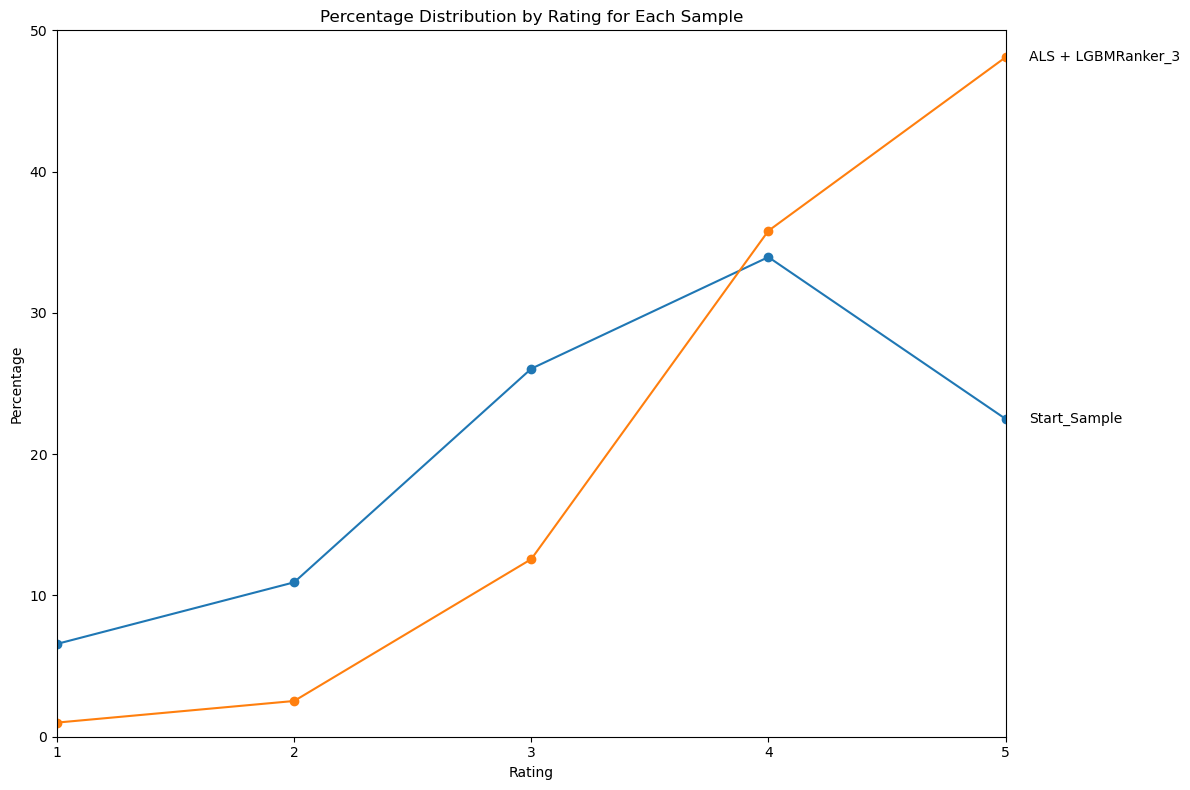

In [126]:
df = distribution_df_raitings_df[
    distribution_df_raitings_df['Sample'].isin(['Start_Sample', 'ALS + LGBMRanker_3', 'DSSM_2'])
].copy()
# Создаем график
fig, ax = plt.subplots(figsize=(12, 8))

# Устанавливаем диапазон для осей
ax.set_xlim(1, 5)
ax.set_ylim(0, 50)

# Добавляем линии для каждого образца и подписываем их справа
for i, row in df.iterrows():
    ax.plot(range(1, 6), row[1:], marker='o', label=row["Sample"])
    ax.text(5.1, row[5], row["Sample"], va='center')  # Добавляем подпись справа от последней точки

# Настройка осей и подписи
ax.set_xlabel("Rating")
ax.set_ylabel("Percentage")
ax.set_title("Percentage Distribution by Rating for Each Sample")

# Метки для оси X
ax.set_xticks([1, 2, 3, 4, 5])

# Легенду можно скрыть, если подписи справа достаточно
plt.legend().set_visible(False)

# Отображаем график
plt.tight_layout()
plt.show()

#### 3.2.2 Precision at K (Precision@K)

**P𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛@K** - доля позитивных элементов в первых k позициях

**positive_cutoff:** Сначала обозначаем наш positive_cutoff, например, positive_cutoff = 4 (всё что 4 или 5 это positive)  

**k:** Выбираю окно в котором буду считать долю позитивных вариантов  

$Precision@K = \frac{1}{k}\sum\limits_{i=1}^{k} Relevance@i$  

#### Алгоритм рассчёта:  
1) Для каждого user_id выделяю топ k наивысших балла (пусть k = 5)  
2) Для каждого user_id считаю долю items >= positive_cutoff (то есть долю фильмов с рейтингом 4,5, если таких фильмов 3, то доля для конкретного user_id будет 0.6 (3 из 5), но мы ее умножаем на 100 переводя в %  
3) Беру средний показатель доли по всем user_id  

In [127]:
def Precision(data, # таблица с результатами
              Name_model, # прописываю название модели
              filtered_columns, # колонки по которым будем мерить результаты оценок
              top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
              rank_column, # колонка результатов по которой провожу замер Precision
              top_N, # окно - top_N айтемов
              positive_cutoff # уровень по которому определяю хороший/плохой айтем
             ):

    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <=top_N_for_filter).all(axis=1)]
    
    # сортирую данные, чтобы 'user_id' был по порядку, 
    top_movie_id_by_rank = data_copy.sort_values(['user_id', rank_column], ascending=[True, True])

    # оставляю только top_N минимальных по rank
    top_movie_id_by_rank = top_movie_id_by_rank.groupby('user_id').head(top_N).reset_index(drop=True)
    
    
    top_movie_id_by_rank = top_movie_id_by_rank[top_movie_id_by_rank['rating']>=positive_cutoff].groupby('user_id').count().reset_index()[['user_id',rank_column]]
    top_movie_id_by_rank.columns = ['user_id','positive']
    top_movie_id_by_rank['Precision@K'] = top_movie_id_by_rank['positive']/top_N

    Hit_rate = (100*sum(top_movie_id_by_rank['positive'])/(top_N*top_movie_id_by_rank.shape[0]))
    
    return pd.DataFrame([[Name_model,round(Hit_rate, 2)]], columns = ['Sample','Precision'])

In [128]:
data = data_Test_for_metrics.copy()
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

Precision_K_Table = pd.concat([
    
# only first stage filtering
Precision(data, 'SVD', [], top_N_for_filter, 'rank SVD', top_N, positive_cutoff),
Precision(data, 'KNN_Cos', [], top_N_for_filter, 'rank KNN_cos', top_N, positive_cutoff),
Precision(data, 'KNN_BM25', [], top_N_for_filter, 'rank KNN_BM25', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF', [], top_N_for_filter, 'rank KNN_TFIDF', top_N, positive_cutoff),
Precision(data, 'ALS', [], top_N_for_filter, 'rank ALS', top_N, positive_cutoff),
Precision(data, 'LightFM', [], top_N_for_filter, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1
Precision(data, 'SVD + LGBMRanker_1', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_1', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_1', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_2
Precision(data, 'SVD + LGBMRanker_2', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_2', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_2', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3
Precision(data, 'SVD + LGBMRanker_3', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_3', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_3', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# LGBMRanker
Precision(data, 'LGBMRanker_1', [], top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'LGBMRanker_2', [], top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'LGBMRanker_3', [], top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# DSSM
Precision(data, 'DSSM initial data', [], top_N_for_filter, 'rank DSSM_1', top_N, positive_cutoff),
Precision(data, 'DSSM_additional data', [], top_N_for_filter, 'rank DSSM_2', top_N, positive_cutoff),

]
,axis = 0
).reset_index(drop=True)

In [129]:
Precision_K_Table

,Sample,Precision
0,SVD,67.56
1,KNN_Cos,70.41
2,KNN_BM25,70.23
3,KNN_TFIDF,69.66
4,ALS,76.84
5,LightFM,66.19
6,SVD + LGBMRanker_1,56.53
7,KNN_Cos + LGBMRanker_1,69.02
8,KNN_BM25 + LGBMRanker_1,69.17
9,KNN_TFIDF + LGBMRanker_1,69.35


#### 3.2.3 MAP

**Учитывает сколько из скольких угадали на каждом K, то есть здесь уже важно на какой позиции было угадывание**

Здесь Precision@K не просто среднее, а наростяющим итогом от 1 до 10, учитывая позицию

**MAP (Mean Average Precision)**  

$MAP = \frac{1}{N}\sum\limits_{i=1}^{N} AP_{i}$    

**Average Precision (AP) AP@K**   

AP@K - среди K(например, 5) позиций считается Precision@K и считается для каждого K (1,2,3,4,5)  
После чего суммируем эти Precision@K и делим на количество положительных элементов, то есть сколько айтемов было >=positive_cuttof  

**Плюс** - учитывается позиция положительного айтема  

N — общее количество релевантных элементов для конкретного пользователя.  
Точность(k) — это точность, рассчитанная в каждой позиции.  
rel(k) равен 1, если элемент на позиции k является релевантным, и 0 в противном случае.  

$AP = \frac{1}{n_{relevant}}\sum\limits_{i=1}^{K} P@k*rel(k)$  

$P@k$ — точность на уровне k (число релевантных документов среди первых k элементов)  
$rel(k)$ — индикатор того, является ли документ на позиции k релевантным (0 или 1)  
$𝑛_{relevant}$ — общее количество релевантных документов для данного запроса (или пользователя)  

**Пример:**  
Для одного user_id  
1) Отсортировали Топ 5 'rank_SVD'  
2) Получили:  
rating = [3,5,5,4,5]    
positive = [0,1,1,1,1]  
Precision@K = [0,0.5,0.66,0.75,0.8]  
3) positive*Precision@K = 0 *0 + 1 *0.5 + 1 *0.66 + 1 *0.75 + 1 *0.8 = 2.716667  
4) positive*Precision@K/$𝑛_{relevant}$ = 2.716667/sum([0,1,1,1,1]) = 2.716667/4 = 0.67  

In [130]:
def Average_Precision_AP_per_user(data, 
                         user_id_column,
                         rating_column,
                         rank_column,
                         user_id,
                         top_N, 
                         positive_cutoff):
    
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)

    if data.shape[0]<top_N:
        result = -1
    
    else:
        data['positive'] = (data[rating_column] >= positive_cutoff).astype(int)

        data['Precision@K'] = (data['positive']*data['positive'].cumsum())/list(range(1,top_N+1))


        if sum(data['positive'])==0:
            result = 0
        else:
            result = sum(data['Precision@K'])/sum(data['positive'])
    return result

def Average_Precision_AP(data, 
                         Name_model, # прописываю название модели
                         filtered_columns, # колонки по которым будем мерить результаты оценок
                         top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                         user_id_column, # колонка где лежат user_id
                         rating_column, # колонка с настящим рейтингов
                         rank_column, # колонка по предсказанию
                         top_N, # топ N айтемов
                         positive_cutoff # граница по которой выделяем хороший/плохой айтем
                        ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    result_table = []
    result = []
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        #print(i)
        Average_Precision_AP_per_user_val = Average_Precision_AP_per_user(data_copy, 
                         user_id_column,
                         rating_column,
                         rank_column,
                         i,
                         top_N, 
                         positive_cutoff)
        
        if Average_Precision_AP_per_user_val == -1:
            count_users_less_than_top_N+=1
            # print('there is', user_id_column ,'< top_N')
            #return
        else:
            result.append(Average_Precision_AP_per_user_val)
        # result_table.append([i,Average_Precision_AP_per_user_val])
    
    # pd.DataFrame(result_table,columns=[user_id_column,'Average_Precision'])
    
    
    print(Name_model+ " ", count_users_less_than_top_N)
    MAP = np.mean(np.array(result))
    return pd.DataFrame([[Name_model,round(MAP, 2)]], columns = ['Sample','MAP'])

In [131]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

MAP_Table = pd.concat([
    
# only first stage filtering
Average_Precision_AP(data, 'SVD', [],top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS', [],top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM', [],top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1
Average_Precision_AP(data, 'SVD + LGBMRanker_1', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_1', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_1', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_2
Average_Precision_AP(data, 'SVD + LGBMRanker_2', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_2', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_2', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3
Average_Precision_AP(data, 'SVD + LGBMRanker_3', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_3', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_3', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# LGBMRanker
Average_Precision_AP(data, 'LGBMRanker_1', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'LGBMRanker_2', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'LGBMRanker_3', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),

# pred_DSSM
Average_Precision_AP(data, 'DSSM initial data', [],top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'DSSM_additional data', [],top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N, positive_cutoff)
]
,axis = 0
).reset_index(drop=True)

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  224
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  224
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  224
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [132]:
MAP_Table

,Sample,MAP
0,SVD,0.77
1,KNN_Cos,0.80
2,KNN_BM25,0.80
3,KNN_TFIDF,0.79
4,ALS,0.86
5,LightFM,0.74
6,SVD + LGBMRanker_1,0.83
7,KNN_Cos + LGBMRanker_1,0.85
8,KNN_BM25 + LGBMRanker_1,0.85
9,KNN_TFIDF + LGBMRanker_1,0.84


#### 3.2.4 Normalized Discounted Cumulative Gain at K (nDCG@K)  

nDCG@K - сравнение моего распределения на уровне K с идеальным, делю 1 показатель на другой и получаю значение в диапазоне от до до 1

Чем выше стоит релевантный элемент, тем больший вклад он вносит в итоговую оценку. nDCG нормализует итоговый результат, чтобы значения находились в диапазоне от 0 до 1. nDCG = 1.0 означает, что ранжирование идеальное.  

$rel_{i}$ - релевантность элемента на позиции *i*  
$K$ - количество элементов в топе, котороые мы анализируем  
$log_{2}(i+1)$ - это логарифмическое снижение вклада в зависимости от позиции элемента в списке

**Discounted Cumulative Gain (DCG)**  

$DCG@K = \frac{1}{N}\sum\limits_{i=1}^{K} \frac{2^{rel_{i}}-1}{log_{2}(i+1)}$

**Ideal DCG (IDCG)**   

$IDCG@K = \frac{1}{N}\sum\limits_{i=1}^{K} \frac{2^{rel^{ideal}_{i}}-1}{log_{2}(i+1)}$  

**Ideal DCG (IDCG)**

$nDCG@K = \frac{DCG}{IDCG}$  

**Пример:**  

**A) Для одного user_id:**    
1) Отсортировываем по столбцу prediction  
2) Беру топ k (пусть будет 5) элементов  
3) Получаю 2 списка:  
rank = [5, 1, 4, 4, 5] - реальные, фактические значения    
ideal_rank = [5, 5, 5, 4, 1] - как бы они расположились в идеале  
4) Куммулятивно считаю суммы фактических и идеальных рангов:  

**Sum_real** = 5/math.log2(0+2) + 1/math.log2(1+2) + 4/math.log2(2+2) + 4/math.log2(3+2) + 5/math.log2(4+2)  
**Sum_ideal** = 5/math.log2(0+2) + 5/math.log2(1+2) + 5/math.log2(2+2) + 4/math.log2(3+2) + 1/math.log2(4+2)  

**nDCG_per_user** = Sum_real/Sum_ideal  

**Б) Для всех user_id:**    
**nDCG** = mean(nDCG_per_user)   

**Важное замечание:**  
Если у меня из топ 100 1-го этапа входит только 4 в Test для конкретного user, то я считаю показатель для 4-х строк  

In [133]:
# реализовал функции вручную самостотельно, что совпало с библиотечной функцией
def nDCG_per_user(data,
       user_id,
       user_id_column,
       rating_column,
       rank_column,
       top_N):

     
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)
    
    if data.shape[0]<top_N:
        nDCG = -1
    else:
        rating_List = data[rating_column]
        ideal_rating_List = sorted(rating_List,reverse=True)


        Sum = 0
        Sum_ideal = 0

        top_N = min(top_N,len(rating_List))

        for i in range(top_N):

            # with degree
            #Sum+=(2**(rating_List[i])-1)/math.log2(i+2)
            #Sum_ideal+=(2**(ideal_rating_List[i])-1)/math.log2(i+2)

            # without degree
            Sum+=(rating_List[i])/math.log2(i+2)
            Sum_ideal+=(ideal_rating_List[i])/math.log2(i+2)


        nDCG = Sum/Sum_ideal

    return nDCG

def nDCG(data,
       Name_model, # прописываю название модели
       filtered_columns, # колонки по которым будем мерить результаты оценок
       top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
       user_id_column, # колонка где лежат user_id
       rating_column, # колонка с настящим рейтингов
       rank_column, # колонка по предсказанию
       top_N, # топ N айтемов
        ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <=top_N_for_filter).all(axis=1)]
    
    result = []
    
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        
        nDCG_per_user_val = nDCG_per_user(data_copy, i, user_id_column, rating_column, rank_column, top_N)
        
        if nDCG_per_user_val==-1:
            count_users_less_than_top_N+=1
        else:
            result.append(nDCG_per_user_val)
     
    print(Name_model+ " ", count_users_less_than_top_N)
    nDCG_val = sum(result)/len(result)
    
    return pd.DataFrame([[Name_model,round(nDCG_val, 2)]], columns = ['Sample','nDCG'])

In [134]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4


nDCG_Table = pd.concat([

# only first stage filtering
nDCG(data,'SVD', [], top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N),
nDCG(data,'KNN_Cos', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N),     
nDCG(data,'KNN_BM25', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N),     
nDCG(data,'KNN_TFIDF', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N),
nDCG(data,'ALS', [], top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N),
nDCG(data,'LightFM', [], top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N),

# + second stage: LGBMRanker_1
nDCG(data,'SVD + LGBMRanker_1', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'ALS + LGBMRanker_1', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'LightFM + LGBMRanker_1', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
    
# + second stage: LGBMRanker_2
nDCG(data,'SVD + LGBMRanker_2', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'ALS + LGBMRanker_2', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'LightFM + LGBMRanker_2', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),

# + second stage: LGBMRanker_3
nDCG(data,'SVD + LGBMRanker_3', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'ALS + LGBMRanker_3', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'LightFM + LGBMRanker_3', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),

# LGBMRanker
nDCG(data,'LGBMRanker_1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'LGBMRanker_2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'LGBMRanker_3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
   
# DSSM
nDCG(data,'DSSM initial data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N),
nDCG(data,'DSSM_additional data' , [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N),
  
]
,axis = 0
).reset_index(drop=True)  

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  224
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  224
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  224
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [135]:
nDCG_Table

,Sample,nDCG
0,SVD,0.94
1,KNN_Cos,0.95
2,KNN_BM25,0.95
3,KNN_TFIDF,0.95
4,ALS,0.96
5,LightFM,0.93
6,SVD + LGBMRanker_1,0.96
7,KNN_Cos + LGBMRanker_1,0.96
8,KNN_BM25 + LGBMRanker_1,0.96
9,KNN_TFIDF + LGBMRanker_1,0.96


**Встроенная ф-я метрики nDCG@k**

In [136]:
from sklearn.metrics import ndcg_score

# создаём y_true и y_score
data = data_Test_for_metrics.copy()

user_id_column = 'user_id'
rating_column = 'rating'
rank_column = 'rank SVD'
top_N = 10

# SVD    
y_true_SVD = []
y_score_SVD = []
user_id_List_SVD = sorted(set(data[user_id_column]))
data_sorted_SVD = data.sort_values([user_id_column, rank_column], ascending=[True, True]).reset_index(drop=True)

#data_sorted_SVD

for i in user_id_List_SVD:
    y_true_SVD.append((list(data_sorted_SVD[data_sorted_SVD[user_id_column]==i][rating_column]))[:top_N])
    y_score_SVD.append((list(data_sorted_SVD[data_sorted_SVD[user_id_column]==i][rank_column]))[:top_N])

ndcg_SVD = ndcg_score(y_true_SVD, y_score_SVD, k=top_N)
ndcg_SVD

0.926201831051178

#### 3.2.5 Mean reciprocal rank (MRR@K)

$MMR = \frac{1}{|Q|}\sum \limits_{i=1}^{Q} {\frac{1}{rank_{i}}}$


MMR@k (Mean Reciprocal Rank at k) существует и является расширением базовой метрики MMR. MMR@k используется для оценки качества рекомендаций или ранжирования, но только для первых k элементов в списке. Формула такая же

Считаем для всех user_id,
для одного  user_id очень простая по своей сути величина, равная обратному ранку первого правильно угаданного элемента.

Если у одного или нескольких пользователей нет релевантных фильмов, то их вклад в MMR равен 0.
MMR все равно рассчитывается как среднее значение Reciprocal Rank для всех пользователей, включая тех, у кого нет релевантных элементов.

**Пример:**  

**Для одного user_id:**  

1) Сортируем по столбцу prediction  
2) Берём топ k элементов  
3) Классифицируем по positive_cutoff  
3) Получаем:
raiting_1 = [1, 0, 1, 1, 1]   
**MMR@K_per_user_1** = (1/1 + 0/2 + 2/3 + 3/4 + 4/5)/4 = 3.21/4 = 0.80  

raiting_2 = [1, 0, 0, 1, 1]   
**MMR@K_per_user_1** = (1/1 + 0/2 + 0/3 + 2/4 + 3/5)/3 = 2.1/3 = 0.70  

То есть мы смотрим на реальную позицию в моём рейтинге: 4 и позицию сколько я уже угадал к этому моменту, например, это только 2-ой "хороший" айтем. Тогда получаю 2/4. Таким образом суммирую все положительный айтемы учитывая их позицию в моём рейтинге и делю на количество "хороших" айтемов  

**Для всех user_id:**  

**MMR@K** = mean(**MMR@K_per_user**)

In [137]:
from sklearn.metrics import label_ranking_average_precision_score

In [138]:
# Ф-я конвертирующая [5,4,3,2,1] -> [1,1,0,0,0]
def convert_pred_to_bin_value(positive_cutoff, y_true):
    y_true_bin = []

    for i in y_true:
        if i>=positive_cutoff:
            y_true_bin.append(1)
        else:
            y_true_bin.append(0)

    return y_true_bin

# MMR@K per user
def MMR_K_per_user(data,
       user_id,
       user_id_column,
       rating_column,
       rank_column,
       top_N, # топ N айтемов
       positive_cutoff
       ):
    
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)
    
    if data.shape[0]<top_N:
        result = -1
    else:
        #print(positive_cutoff, list(data[rating_column]))
        rating_class = [convert_pred_to_bin_value(positive_cutoff, list(data[rating_column]))]
        rank_values = [list(data[rank_column])]
        #print(rating_class)
        #print(rank_values)
        result = label_ranking_average_precision_score(rating_class, rank_values)
    
    return result

# MMR@K
def MMR_K(data,
          Name_model, # прописываю название модели
          filtered_columns, # колонки по которым будем мерить результаты оценок
          top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку
          user_id_column, # колонка где лежат user_id
          rating_column, # колонка с настящим рейтингов
          rank_column, # колонка по предсказанию
          top_N, # топ N айтемов
          positive_cutoff # граница по которой выделяем хороший/плохой айтем
         ):
    
    data_copy = data.copy()

    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    result_table = []
    result = []
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        #print(i)
        MMR_K_per_user_val = MMR_K_per_user(data_copy,
                       i,
                       user_id_column,
                       rating_column,
                       rank_column,
                       top_N,                  
                       positive_cutoff)
        
        if MMR_K_per_user_val == -1:
            count_users_less_than_top_N+=1
        else:
            result.append(MMR_K_per_user_val)
        
    print(Name_model+ " ", count_users_less_than_top_N)
    MMR_K = np.mean(np.array(result))
    return pd.DataFrame([[Name_model,round(MMR_K, 2)]], columns = ['Sample','MMR_K'])

In [139]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

MMR_K_Table = pd.concat([
    
# only first stage filtering

MMR_K(data, 'SVD', [], top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N, positive_cutoff), 
MMR_K(data, 'ALS', [], top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N, positive_cutoff),
MMR_K(data, 'LightFM', [], top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1

MMR_K(data, 'SVD + LGBMRanker_1', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_1', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_1', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),

# + second stage: LGBMRanker_2

MMR_K(data, 'SVD + LGBMRanker_2', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_2', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_2', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3

MMR_K(data, 'SVD + LGBMRanker_3', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_3', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_3', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),    
    
# LGBMRanker

MMR_K(data, 'LGBMRanker_1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'LGBMRanker_2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'LGBMRanker_3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
 
# DSSM

MMR_K(data, 'DSSM initial data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N, positive_cutoff),
MMR_K(data, 'DSSM_additional data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N, positive_cutoff)
]
,axis = 0
).reset_index(drop=True)

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  224
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  224
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  224
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [140]:
MMR_K_Table

,Sample,MMR_K
0,SVD,0.73
1,KNN_Cos,0.73
2,KNN_BM25,0.74
3,KNN_TFIDF,0.74
4,ALS,0.78
5,LightFM,0.72
6,SVD + LGBMRanker_1,0.74
7,KNN_Cos + LGBMRanker_1,0.77
8,KNN_BM25 + LGBMRanker_1,0.77
9,KNN_TFIDF + LGBMRanker_1,0.76


#### 3.2.6 All metrisc

In [141]:
from functools import reduce

# Список таблиц
tables = [Precision_K_Table, MAP_Table, nDCG_Table, MMR_K_Table]

# Объединение таблиц по колонке 'Sample'
All_quality_metric_Table = reduce(lambda left, right: pd.merge(left, right, on='Sample', how='outer'), tables)

In [142]:
All_quality_metric_Table = All_quality_metric_Table.style.format(precision=2) \
                    .background_gradient(subset=['Precision', 'MAP', 'nDCG', 'MMR_K'], cmap='RdYlGn', low=0.4, high=0.5)

All_quality_metric_Table

,Sample,Precision,MAP,nDCG,MMR_K
0,ALS,76.84,0.86,0.96,0.78
1,ALS + LGBMRanker_1,56.91,0.92,0.97,0.89
2,ALS + LGBMRanker_2,56.61,0.90,0.96,0.89
3,ALS + LGBMRanker_3,56.64,0.90,0.96,0.90
4,DSSM initial data,70.67,0.80,0.95,0.74
5,DSSM_additional data,73.18,0.81,0.95,0.77
6,KNN_BM25,70.23,0.80,0.95,0.74
7,KNN_BM25 + LGBMRanker_1,69.17,0.85,0.96,0.77
8,KNN_BM25 + LGBMRanker_2,71.61,0.86,0.96,0.79
9,KNN_BM25 + LGBMRanker_3,71.58,0.86,0.96,0.79


## 4 Метрики разнообразия рекомендаций

### Краткое изложение пункта 4 Метрики разнообразия рекомендаций

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">    
     
Считаем метрики разнообразия товаров для всех моделей на данных, на которых не обучали модели (не Train)
результаты можно посмотреть здесь **4.5 ALL Diversity metrics**  

Также представлена теория по каждой метрике

**Метрики разнообразия:**  
4.2 Intra-List Diversity (𝐼𝐿𝐷)  
4.3 Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)  
4.4 Serendipity  

### 4.1 Формирование таблиц для подсчёта Diversity метрик

In [143]:
from itertools import combinations

#### Таблица рангов

#### Формируем выборку для того, чтобы посчитать метрики Diversity не для Train, 
Мы обучали на выборке Train и уже знам что фактически был просмотр фильма, а теперь формируем на выборке которой не обучались (либо Test, либо взаимодействия ещё не было)

In [144]:
Big_rank_Table_for_Diversity_metrics = Big_rank_Table[Big_rank_Table['Sample']!='Train'].reset_index(drop=True).copy()
Big_rank_Table_for_Diversity_metrics.head()

,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,6,395,577,1283,536,655,835,466,566,580,319,554,Test,5.0
1,1,10,384,293,223,283,107,343,236,197,171,222,194,Test,3.0
2,1,12,323,12,14,15,5,70,6,127,153,653,134,Test,5.0
3,1,14,1264,131,84,122,342,134,252,527,586,351,165,Test,5.0
4,1,17,508,168,287,206,643,397,938,695,741,848,853,Test,3.0


In [145]:
def func_for_filtered_for_Diversity_metrics(data,
                                            filtered_columns, # столбцы по которым будем очищать пустые значения
                                            top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку
                                            rank_columns, # столбец по которому будем ражнировать окончательно
                                            top_N # топ k для второго этапа
                                           ):
    data_copy = data.copy()

    if filtered_columns != []:
        #data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
        data_copy = data_copy.groupby('user_id').apply(lambda x: x.nsmallest(top_N_for_filter, filtered_columns)).reset_index(drop=True)
    
    data_copy = data_copy.groupby('user_id').apply(lambda x: x.nsmallest(top_N, rank_columns)).reset_index(drop=True)
    
    return data_copy[['user_id','item_id', rank_columns]]

In [146]:
data = Big_rank_Table_for_Diversity_metrics.copy()
top_N = 5

# only first stage filtering
df_for_Diversity_SVD = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank SVD',top_N)
df_for_Diversity_KNN_Cos = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_cos',top_N)
df_for_Diversity_KNN_BM25 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_BM25',top_N)
df_for_Diversity_KNN_TFIDF = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_TFIDF',top_N)
df_for_Diversity_ALS = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank ALS',top_N)
df_for_Diversity_LightFM = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LightFM',top_N)

# + second stage: LGBMRanker_1
df_for_Diversity_SVD_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_Cos_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_BM25_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_ALS_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_LightFM_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_1',top_N)

# + second stage: LGBMRanker_2
df_for_Diversity_SVD_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_Cos_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_BM25_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_ALS_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_LightFM_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_2',top_N)

# + second stage: LGBMRanker_3
df_for_Diversity_SVD_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_Cos_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_BM25_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_ALS_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_LightFM_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_3',top_N)

# LGBMRanker
df_for_Diversity_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_3',top_N)

# DSSM
df_for_Diversity_DSSM_1 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank DSSM_1',top_N)
df_for_Diversity_DSSM_2 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank DSSM_2',top_N)

In [147]:
df_for_Diversity_DSSM_1.head(10)

,user_id,item_id,rank DSSM_1
0,1,498,1
1,1,1124,3
2,1,430,4
3,1,848,6
4,1,1020,7
5,2,498,1
6,2,50,2
7,2,1124,3
8,2,430,4
9,2,172,5


#### Таблица жанров: item_genres_one_hot

Подготовим матрицу item_genres_one_hot, убрав лишние столбца для того чтобы примеить её при подсчёте показателя 𝐼𝐿𝐷 (ниже)  

In [148]:
item_genres_one_hot = pd.concat([movie_data[['item_id']],movie_data.iloc[:,5:]],axis=1)
print(item_genres_one_hot.shape)
item_genres_one_hot.head()

(1682, 20)


,item_id,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### 4.2 Intra-List Diversity (𝐼𝐿𝐷)

Среднее разнообразие товара в полке

Оценим для обеих моделей среднее разнообразие контента в полках с помощью метрики $ILD$:

$$ ILD = \frac{1}{|R| ( |R| - 1 )} \sum_{i \in R} \sum_{j \in R} d(i, j) . $$

В нашем примере сначала ищем среднее число не совпадений всех пар фильмов-рекомендаций внутри одного user_id.  
Например, если 10 рекомендаций, значит всемовзможных пар будет 45, у каждой пары есть число не сопвпадающих элементов вектора по жанрам. Так как фильм имеет какие-то жанры, а у нас их допустим 100, то **НЕ** совпадений может быть от 0 до 100 включительно.

Далее получив для каждой из 45 пар количество  несовпадений получаем среднюю дистанцию для одного user_id (среднее от 45 дистанций)

затем получаем **ILD** считая среднее от средних дистанций для всех user_id. 

Таким образом получим численную оценку по жанрам для конкретной модели

В качестве расстояния $d(i, j)$ используем [расстояние Хэмминга](https://neerc.ifmo.ru/wiki/index.php?title=Расстояние_Хэмминга) между one-hot векторами жанров. Пример расчета:

Количество элементов, в котором значение не совпадает в векторе жанров  

##### <center>d(10<font color='blue'>1</font>1<font color='blue'>1</font>01, 10<font color='red'>0</font>1<font color='red'>0</font>01) = 2.</center>

**Пример:**  

**Для одного user_id:**  
Всего 5 жанров, рекомендуем топ 3 фильма:  

Фильм 1 = [1,0,0,1,0] (2 жанра у фильма)     
Фильм 2 = [0,0,0,0,1] (1 жанр у фильма)      
Фильм 3 = [1,0,0,0,1] (2 жанра у фильма)   

Всего 3 пары:  
расстояние Хэмминга (1-2) = 5 не совпадающих элемента  
расстояние Хэмминга (1-3) = 4 не совпадающих элемента  
расстояние Хэмминга (2-3) = 4 не совпадающих элемента  

**расстояние Хэмминга_для_одного_пользователя** = mean([5,4,4]) = 4.3  

**Для всех user_id:**  
расстояние Хэмминга = mean(расстояние Хэмминга_для_одного_пользователя)  

In [149]:
# комментарии

# Считаем расстояние Хеминга
# подаются пары (1234,5423) - фильмы и  для каждой из них смотрим количество не совпадающих элементов, например, из 95 жанров  
# 3 штуки НЕ совпало, значит для пары (1234,5423) вернет 3
def get_hamming_distances(pairs, features):
    items_0 = pairs.map(lambda pair: pair[1]).values
    items_1 = pairs.map(lambda pair: pair[0]).values

    features_0 = features.reindex(items_0).values
    features_1 = features.reindex(items_1).values
    return np.sum(features_0 != features_1, axis=1)

# Усредняем по пользователю
def calculate_intra_list_diversity_per_user(recommendations, features):
    
    # Для каждого user_id создаёт пары длиной 2 (combinations(x, 2))
    # то есть если у меня у user_id есть фильмы (1,5,10), то пары будут следующими: 
    # 1-5,1-10 и 5-10, соотвественно для 10 будет всего 45 уникальных пар
    recommended_item_pairs = recommendations.groupby("user_id")["item_id"].apply(lambda x: list(combinations(x, 2)))
    
    # Делаем таблицу со столбцами user_id и item_pair
    recommended_item_pairs = recommended_item_pairs.reset_index().explode("item_id").rename(columns={"item_id": "item_pair"})
    
    # для каждой пары рассчитываем количество не совпадающего элемента по жанрам
    recommended_item_pairs["dist"] = get_hamming_distances(recommended_item_pairs["item_pair"], features)
    
    return recommended_item_pairs[["user_id", "dist"]].groupby("user_id").agg("mean")

In [150]:
name_model_list = ['SVD',
                   'KNN_Cos',
                   'KNN_BM25',
                   'KNN_TFIDF',
                   'ALS',
                   'LightFM',
                   
                   'SVD + LGBMRanker_1',
                   'KNN_Cos + LGBMRanker_1',
                   'KNN_BM25 + LGBMRanker_1',
                   'KNN_TFIDF + LGBMRanker_1',
                   'ALS + LGBMRanker_1', 
                   'LightFM + LGBMRanker_1',
                   
                   'SVD + LGBMRanker_2',
                   'KNN_Cos + LGBMRanker_2',
                   'KNN_BM25 + LGBMRanker_2',
                   'KNN_TFIDF + LGBMRanker_2',
                   'ALS + LGBMRanker_2', 
                   'LightFM + LGBMRanker_2',
                   
                   'SVD + LGBMRanker_3',
                   'KNN_Cos + LGBMRanker_3',
                   'KNN_BM25 + LGBMRanker_3',
                   'KNN_TFIDF + LGBMRanker_3',
                   'ALS + LGBMRanker_3', 
                   'LightFM + LGBMRanker_3',
                   
                   'LGBMRanker_1',
                   'LGBMRanker_2',
                   'LGBMRanker_3',
                   
                   'DSSM_1',
                   'DSSM_2'
                   ]

In [151]:
ILD_List = [
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM, item_genres_one_hot)),

np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_1, item_genres_one_hot)),
    
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_2, item_genres_one_hot)),
    
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_3, item_genres_one_hot)),
                                                                          
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_3, item_genres_one_hot)),

np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_DSSM_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_DSSM_2, item_genres_one_hot))
    
]

In [152]:
ILD_Table = pd.DataFrame(list(map(list,zip(name_model_list,ILD_List))),columns = ['Sample','ILD'])
ILD_Table

,Sample,ILD
0,SVD,4.268293
1,KNN_Cos,4.725769
2,KNN_BM25,4.836691
3,KNN_TFIDF,4.579215
4,ALS,3.897773
5,LightFM,4.677625
6,SVD + LGBMRanker_1,4.372428
7,KNN_Cos + LGBMRanker_1,5.134040
8,KNN_BM25 + LGBMRanker_1,5.092259
9,KNN_TFIDF + LGBMRanker_1,5.118134


### 4.3 Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)
мера насколько редкие фильмы были рекомендованы без учёта позиции рекомендации  

**Отражает уникальность рекомендаций**, насколько непопулярные фильмы мы предлагаем     

Оценим новизну рекомендаций. Новизна товара обратно пропорциональна количеству пользователей, которые с ним взаимодействовали в обучающей выборке. Значение метрики для полки определяется как средняя "новизна" товаров в полке.

$$ MIUF = -\frac{1}{|R|} \sum_{i \in R} \log_2 \frac{|U_i|}{|U|} $$  

**Своими словами:**    
1) Находим для каждого фильма количество уникальных user_id  
2) Делим это количество на количество всех уникальных user_id в выборке  
3) Рассчитываем -log_2(кол-во уникальных user_id для фильма/кол-во всех уникальных user_id)  
4) MIUF = Усредняем по каждому пользователю этот показатель, ведь у каждого пользователя есть 10 рекомендованных фильмов  

Если фильм популярный, то он получает меньшее значение:  

-np.log2(58 / 100) = 0.78 - фильм смотрело 58 пользователей из 100  
-np.log2(8 / 100) = 3.64 - фильм смотрело 58 пользователей из 100   

**Пример:** 

Сортируем для каждого пользователя айтемы по prediction  

1) 
uid	 = 0  
iid = 1247  
n_users_per_item = 7  
inv_user_freq = -np.log2(7/943) = 7.073759     

2) 
uid	 = 0  
iid = 399  
n_users_per_item = 793  
inv_user_freq = -np.log2(93/943) = 3.341955     

#### Далее урседняем 1)  по всем продуктам 2) по всем пользователям  

Ф-ия для рассчёта показателя IUF:

In [153]:
def calculate_mean_inv_user_frequency_per_user(recommendations, train):
    n_users = train["user_id"].nunique()
    n_users_per_item = train.groupby("item_id")["user_id"].nunique()
    
    recommendations_ = recommendations[["user_id", "item_id"]].copy()
    recommendations_["n_users_per_item"] = recommendations_["item_id"].map(n_users_per_item)
    recommendations_["inv_user_freq"] = -np.log2(recommendations_["n_users_per_item"] / n_users)
    return recommendations_[["user_id", "inv_user_freq"]].groupby("user_id").agg("mean")

In [154]:
MIUF_List = [
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM, data_Train[['user_id','item_id','rating']])),

np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_1, data_Train[['user_id','item_id','rating']])),

np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_2, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_3, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_3, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_DSSM_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_DSSM_2, data_Train[['user_id','item_id','rating']]))

]

In [155]:
MIUF_Table = pd.DataFrame(list(map(list,zip(name_model_list,MIUF_List))),columns = ['Sample','MIUF'])
MIUF_Table

,Sample,MIUF
0,SVD,2.642816
1,KNN_Cos,1.828354
2,KNN_BM25,1.635634
3,KNN_TFIDF,1.839542
4,ALS,4.784937
5,LightFM,1.291097
6,SVD + LGBMRanker_1,2.733252
7,KNN_Cos + LGBMRanker_1,2.089999
8,KNN_BM25 + LGBMRanker_1,2.051971
9,KNN_TFIDF + LGBMRanker_1,2.062338


### 4.4 Serendipity
мера насколько редкие фильмы были рекомендованы с учётом позиции рекомендации   
Учитывает и популярность и то насколько мы высоко поставили фильм в рекоммендации, то есть rank нашей рекомендации  

Оценим "сюрпризность" рекомендаций, т.е. комбинацию оценки новизны и релевантности контента для пользователя.

$$ Serendipity = \frac{1}{|R|} \sum_{i \in R} \max \left( P_i - P^{U}_i , 0 \right) \cdot rel_i $$

$$ P_i = \frac{|I| + 1 - rank_i}{|I|}; \, P^{U}_i = \frac{|I| + 1 - rank^{U}_i}{|I|} $$   

Если Serendipity = 1, то мы вознесли в самый топ супер редкий фильм  

**Своими словами:**   
1) Ищём rank популярности item_id среди всех item_id, например, у нас больше всех пользователей (100 штук) посмотрели фильм item_id, значит у него будет rank = 1  

допустим фильм item_id занимает 288 место по популярности ($rank^{U}_i$=288)  
Всего уникальных фильмов: item_id = 1000

$P^{U}_i = \frac{|I| + 1 - rank^{U}_i}{|I|} = (1000+1-288)/1000 = 0.713$

2) Смотрим какое место присвоила модель: допустим 23  

$P_i = \frac{|I| + 1 - rank_i}{|I|} = (1000+1-23)/1000 = 0.978$  

3) $Serendipity = max(0.978 - 0.713, 0) = 0.265$  

Значит на уровне 0.265 рекомендация этого фильма редкая.

In [156]:
def get_value_popularity_ranks(values):
    value_counts = values.value_counts()
    counts_unique = value_counts.unique()
    count_rank_mapping = pd.Series(index=counts_unique, data=np.arange(len(counts_unique)) + 1)
    return value_counts.map(count_rank_mapping)


def calculate_serendipity_per_user(
    recommendations,
    rank_column,
    train
    ):
    
    
    recommendations_ = recommendations.copy()
    n_items = train["item_id"].nunique()
    item_popularity_ranks = get_value_popularity_ranks(train["item_id"])
    recommendations_["rank_pop"] = recommendations_["item_id"].map(item_popularity_ranks)

    recommendations_["proba_user"] = (n_items + 1 - recommendations_[rank_column]) / n_items
    recommendations_["proba_any_user"] = (n_items + 1 - recommendations_["rank_pop"]) / n_items

    recommendations_["proba_diff"] = np.maximum(
        recommendations_["proba_user"] - recommendations_["proba_any_user"],
        0.0
    )

    return recommendations_[["user_id", "proba_diff"]].groupby("user_id").agg("mean")

In [157]:
# Объединим выборки Train и Test, чтобы узнать популярность фильма во всех выборках
data_raiting_All = pd.concat([data_Train[['user_id','item_id','rating']],data_Test[['user_id','item_id','rating']]]).reset_index(drop=True)

In [158]:
Serendipity_List = [
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD,'rank SVD', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos,'rank KNN_cos', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25,'rank KNN_BM25', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF,'rank KNN_TFIDF', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS,'rank ALS', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM,'rank LightFM', data_raiting_All)),

np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
    
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
    
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
                                                                          
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),

np.mean(calculate_serendipity_per_user(df_for_Diversity_DSSM_1, 'rank DSSM_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_DSSM_2, 'rank DSSM_2', data_raiting_All))
    
]

In [159]:
Serendipity_Table = pd.DataFrame(list(map(list,zip(name_model_list,Serendipity_List))),columns = ['Sample','Serendipity'])
Serendipity_Table

,Sample,Serendipity
0,SVD,0.031557
1,KNN_Cos,0.017054
2,KNN_BM25,0.010930
3,KNN_TFIDF,0.017610
4,ALS,0.109334
5,LightFM,0.000729
6,SVD + LGBMRanker_1,0.048289
7,KNN_Cos + LGBMRanker_1,0.024604
8,KNN_BM25 + LGBMRanker_1,0.022911
9,KNN_TFIDF + LGBMRanker_1,0.022925


### 4.5 ALL Diversity metrics

In [160]:
Diversity_metrics_Table = reduce(lambda left, right: left.merge(right, on='Sample', how='outer'), [ILD_Table, MIUF_Table, Serendipity_Table])

In [161]:
df_styled_Diversity_metrics = Diversity_metrics_Table.style.format(precision=2) \
                    .background_gradient(subset=['ILD','MIUF','Serendipity'], cmap='RdYlGn', low=0.4, high=0.5)

df_styled_Diversity_metrics

,Sample,ILD,MIUF,Serendipity
0,ALS,3.90,4.78,0.11
1,ALS + LGBMRanker_1,4.42,2.68,0.05
2,ALS + LGBMRanker_2,3.51,6.26,0.14
3,ALS + LGBMRanker_3,3.49,6.35,0.15
4,DSSM_1,4.28,4.12,0.09
5,DSSM_2,4.55,3.24,0.08
6,KNN_BM25,4.84,1.64,0.01
7,KNN_BM25 + LGBMRanker_1,5.09,2.05,0.02
8,KNN_BM25 + LGBMRanker_2,4.29,2.62,0.02
9,KNN_BM25 + LGBMRanker_3,4.26,2.63,0.02


## 5 Статистический критерий

### Краткое содержание пункта 5 Статистический критерий

<div style="border: 2px solid #007BFF; padding: 10px; border-radius: 10px; background-color: #f8f9ff;">    

**Краткое содержание:**  
1) Делим выборку на 10 частей    
2) Рассчитываем Ранги для каждой из 10 выборок для двух моделей LGBMRanker_1 и LGBMRanker_2      

LGBMRanker_1 - модель для набора данных без результатов 1-го этапа моделей  
LGBMRanker_2 - модель для набора данных c результатами 1-го этапа моделей  

3) Считаю показатель качества MMR_K для каждой из 2-х моделей для каждой из 10 выборок    
4) Считаю p_valuе для Двухвыборочного критерий Стьюдента(t-test) связанных выборок    
5) Вывод: p_value<0.05 => гипотеза $H_0$ отверагется => Выборки метрик НЕ схожи => ЕСТЬ Разница между моделями, если смотреть именно на параметр MMR_K  

#### LGBMRanker_1 - модель для набора данных без результатов 1-го этапа моделей  
#### LGBMRanker_2 - модель для набора данных c результатами 1-го этапа моделей  

### 5.1 Обучаем модели LGBMRanker на двух наборах данных

In [162]:
from sklearn.model_selection import GroupKFold
import lightgbm as lgb

# Параметры
kf = GroupKFold(n_splits=10)

# модель 1
modelsLGBMRanker_1 = []

# Запуск кросс-валидации
for train_idx, val_idx in kf.split(X_train_1, Y_train, groups=data_Train_large['user_id']):
    X_train_fold, X_val_fold = X_train_1[train_idx], X_train_1[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]
    
    # Группы для фолдов
    group_train = data_Train_large.iloc[train_idx].groupby('user_id')['item_id'].count().values
    group_val = data_Train_large.iloc[val_idx].groupby('user_id')['item_id'].count().values
    
    # Обучение модели
    model = lgb.LGBMRanker()
    model.fit(
        X_train_fold, 
        Y_train_fold, 
        group=group_train,
        eval_set=[(X_val_fold, Y_val_fold)], 
        eval_group=[group_val],
        #eval_at=[1, 2, 5, 10],
    )
    modelsLGBMRanker_1.append(model)
    
# модель 2
modelsLGBMRanker_3 = []

# Запуск кросс-валидации
for train_idx, val_idx in kf.split(X_train_3, Y_train, groups=data_Train_large['user_id']):
    X_train_fold, X_val_fold = X_train_3[train_idx], X_train_3[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]
    
    # Группы для фолдов
    group_train = data_Train_large.iloc[train_idx].groupby('user_id')['item_id'].count().values
    group_val = data_Train_large.iloc[val_idx].groupby('user_id')['item_id'].count().values
    
    # Обучение модели
    model = lgb.LGBMRanker()
    model.fit(
        X_train_fold, 
        Y_train_fold, 
        group=group_train,
        eval_set=[(X_val_fold, Y_val_fold)], 
        eval_group=[group_val],
    )
    modelsLGBMRanker_3.append(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 71273, number of used features: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 71273, number of used features: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data poin

### 5.2 Получаем prediction и rank моделей на выборке Test

#### prediction

In [163]:
prediction_columns_LGBMRanker_1 = []
for i in range(1,len(modelsLGBMRanker_1)+1):
    prediction_columns_LGBMRanker_1.append('pred_LGBMRanker_1 '+str(i))

pred_Table_modelsLGBMRanker_1 = data_Test_large[['user_id','item_id','rating']].copy()
for i in range(len(modelsLGBMRanker_1)):
    pred_Table_modelsLGBMRanker_1[prediction_columns_LGBMRanker_1[i]] = list(modelsLGBMRanker_1[i].predict(X_test_1))

# очищаю от тех user_id, у которых менее 10 строк
pred_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1[pred_Table_modelsLGBMRanker_1['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(pred_Table_modelsLGBMRanker_1.shape)
pred_Table_modelsLGBMRanker_1.head()

prediction_columns_LGBMRanker_3 = []
for i in range(1,len(modelsLGBMRanker_3)+1):
    prediction_columns_LGBMRanker_3.append('pred_LGBMRanker_3 '+str(i))

pred_Table_modelsLGBMRanker_3 = data_Test_large[['user_id','item_id','rating']].copy()
for i in range(len(modelsLGBMRanker_3)):
    pred_Table_modelsLGBMRanker_3[prediction_columns_LGBMRanker_3[i]] = list(modelsLGBMRanker_3[i].predict(X_test_3))

# очищаю от тех user_id, у которых менее 10 строк
pred_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3[pred_Table_modelsLGBMRanker_3['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(pred_Table_modelsLGBMRanker_3.shape)
pred_Table_modelsLGBMRanker_3.head()

(19288, 13)
(19288, 13)


,user_id,item_id,rating,pred_LGBMRanker_3 1,pred_LGBMRanker_3 2,pred_LGBMRanker_3 3,pred_LGBMRanker_3 4,pred_LGBMRanker_3 5,pred_LGBMRanker_3 6,pred_LGBMRanker_3 7,pred_LGBMRanker_3 8,pred_LGBMRanker_3 9,pred_LGBMRanker_3 10
0,1,6,5.0,-2.909290,-2.938253,-2.750344,-3.144365,-2.938430,-2.934351,-2.966134,-3.008810,-3.102570,-3.103041
1,1,10,3.0,-0.415595,-0.081500,-0.945657,-0.404077,-0.706655,-0.259575,-0.467181,-0.440419,-0.172376,-0.400729
2,1,12,5.0,-0.528810,-0.229305,-0.167613,-0.371043,-0.597801,-0.673877,0.010917,-0.085476,0.507906,-0.534112
3,1,14,5.0,-2.760315,-2.728778,-2.607952,-3.026260,-2.974590,-3.077223,-3.059742,-2.880388,-2.624279,-3.177344
4,1,17,3.0,-3.722265,-3.981449,-3.950582,-4.325865,-4.029461,-4.141419,-4.017181,-3.953421,-3.926808,-4.002031


#### rank

In [164]:
for i in range(len(prediction_columns_LGBMRanker_1)):
    
    # Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
    pred_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1.sort_values(
        by=['user_id', prediction_columns_LGBMRanker_1[i]], ascending=[True, False]
    )

    # Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
    pred_Table_modelsLGBMRanker_1['rank LGBMRanker_1 ' + str(i+1)] = pred_Table_modelsLGBMRanker_1.groupby('user_id')[prediction_columns_LGBMRanker_1[i]].rank(
        method='first', ascending=False
    ).astype(int)
    
rank_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1.reset_index(drop=True).copy()
rank_Table_modelsLGBMRanker_1 = rank_Table_modelsLGBMRanker_1.drop(columns = prediction_columns_LGBMRanker_1)
rank_Table_modelsLGBMRanker_1.head()

for i in range(len(prediction_columns_LGBMRanker_3)):
    
    # Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
    pred_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3.sort_values(
        by=['user_id', prediction_columns_LGBMRanker_3[i]], ascending=[True, False]
    )

    # Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
    pred_Table_modelsLGBMRanker_3['rank LGBMRanker_3 ' + str(i+1)] = pred_Table_modelsLGBMRanker_3.groupby('user_id')[prediction_columns_LGBMRanker_3[i]].rank(
        method='first', ascending=False
    ).astype(int)
    
rank_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3.reset_index(drop=True).copy()
rank_Table_modelsLGBMRanker_3 = rank_Table_modelsLGBMRanker_3.drop(columns = prediction_columns_LGBMRanker_3)
rank_Table_modelsLGBMRanker_3.head()

,user_id,item_id,rating,rank LGBMRanker_3 1,rank LGBMRanker_3 2,rank LGBMRanker_3 3,rank LGBMRanker_3 4,rank LGBMRanker_3 5,rank LGBMRanker_3 6,rank LGBMRanker_3 7,rank LGBMRanker_3 8,rank LGBMRanker_3 9,rank LGBMRanker_3 10
0,1,60,5.0,2,1,2,2,3,1,1,2,2,1
1,1,114,5.0,1,2,1,1,1,2,3,1,1,2
2,1,171,5.0,3,6,4,4,4,3,4,4,7,3
3,1,113,5.0,5,3,3,3,2,4,2,5,3,4
4,1,189,3.0,6,5,7,7,6,6,5,7,8,5


### 5.3 Считаем метрики для 10 моделей

In [165]:
# модель 1
data = rank_Table_modelsLGBMRanker_1.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4



MMR_K_Table_LGBMRanker_1 = pd.concat([
    # only first stage filtering
    MMR_K(data,'LGBMRanker_1 1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 1', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 2', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 3', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 4', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 4', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 5', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 5', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 6', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 6', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 7', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 7', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 8', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 8', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 9', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 9', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 10', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 10', top_N,positive_cutoff)
    
])

# модель 2
data = rank_Table_modelsLGBMRanker_3.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10


MMR_K_Table_LGBMRanker_3 = pd.concat([
    # only first stage filtering
    MMR_K(data,'LGBMRanker_3 1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 1', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 2', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 3', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 4', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 4', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 5', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 5', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 6', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 6', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 7', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 7', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 8', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 8', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 9', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 9', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 10', [  ], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 10', top_N,positive_cutoff)
    
])

LGBMRanker_1 1  0
LGBMRanker_1 2  0
LGBMRanker_1 3  0
LGBMRanker_1 4  0
LGBMRanker_1 5  0
LGBMRanker_1 6  0
LGBMRanker_1 7  0
LGBMRanker_1 8  0
LGBMRanker_1 9  0
LGBMRanker_1 10  0
LGBMRanker_3 1  0
LGBMRanker_3 2  0
LGBMRanker_3 3  0
LGBMRanker_3 4  0
LGBMRanker_3 5  0
LGBMRanker_3 6  0
LGBMRanker_3 7  0
LGBMRanker_3 8  0
LGBMRanker_3 9  0
LGBMRanker_3 10  0


In [166]:
MMR_K_Table_LGBMRanker_1

,Sample,MMR_K
0,LGBMRanker_1 1,0.75
0,LGBMRanker_1 2,0.75
0,LGBMRanker_1 3,0.76
0,LGBMRanker_1 4,0.75
0,LGBMRanker_1 5,0.75
0,LGBMRanker_1 6,0.75
0,LGBMRanker_1 7,0.75
0,LGBMRanker_1 8,0.75
0,LGBMRanker_1 9,0.75
0,LGBMRanker_1 10,0.74


In [167]:
MMR_K_Table_LGBMRanker_3

,Sample,MMR_K
0,LGBMRanker_3 1,0.76
0,LGBMRanker_3 2,0.77
0,LGBMRanker_3 3,0.77
0,LGBMRanker_3 4,0.77
0,LGBMRanker_3 5,0.77
0,LGBMRanker_3 6,0.77
0,LGBMRanker_3 7,0.77
0,LGBMRanker_3 8,0.77
0,LGBMRanker_3 9,0.76
0,LGBMRanker_3 10,0.76


### 5.4 T-test, p_value

#### Определение p-value
p-value - вероятность получить значение t (статистику эксперимента) или большее под предположением H0.  
p = P(T≥t|H<sub>0</sub>)

#### t-test  
Двухвыборочный критерий Стьюдента(t-test) связанных выборок  

Samples:  
X<sup>n1</sup><sub>1</sub> = (X<sub>11</sub>,...,X<sub>1n1</sub>)   
X<sup>n1</sup><sub>1</sub> = (X<sub>11</sub>,...,X<sub>1n1</sub>)   

$X_1$ ~ $N(μ,𝜎_1^2)$, $X_2$ ~ $N(μ,𝜎_2^2)$, $𝜎_1^2$,$𝜎_2^2$ - is known  
$H_0: μ=μ_0$  
$H_1: μ<≠>μ_0 (μ<μ_0,μ<μ_0$ - One-sided alternatives ,$μ≠μ_0$ - Two-sided alternatives)  

Statistic:  $T(X_1^{n1},X_2^{n2}) =  \frac{\bar{X_1} - \bar{X_2}}{\frac{S}{\sqrt{n}}}$  

$S^2 = \frac{1}{n-1}\sum({D_i - \bar{D})^2}$, $D_i = X_{1i} - X_{2i}$ - попарные разности, не путать с дисперсией


If $H_0$ is true, then $T(X_1^n,X_2^n)$~St(n-1)  

$ p\_value = 
\begin{cases}
F_{st(n-1)}(t), \quad H_1: μ < μ_0 \\
1 - F_{st(n-1)}(t), \quad H_1: μ > μ_0 \\
2 \cdot (1 - F_{st(n-1)}(|t|)), \quad H_1: μ \neq μ_0
\end{cases}
$  

Мой случай $p\_value = 2\cdot (1 - F_{st(n-1)}(|t|))$  
$F_{st(n-1)}$ - ф-ия распределения Стьюдента  

#### Рассчёт руками

In [168]:
from scipy import stats

In [169]:
from scipy.stats import t

N_Parameters = 10

# Данные
data_1 = list(MMR_K_Table_LGBMRanker_1['MMR_K'])
data_2 = list(MMR_K_Table_LGBMRanker_3['MMR_K'])

# Вычисляем разности
diff_list = []
for i in range(N_Parameters):
    diff_list.append(data_1[i]-data_2[i])

# Среднее значение разностей
mean_diff_val = sum(diff_list)/N_Parameters

# Стандартное отклонение разностей
Sum_deviation = 0 # отклонение от среднего
for i in range(N_Parameters): 
    Sum_deviation+= (diff_list[i]-mean_diff_val)**2

# Это и есть S, которая в формуле
std = (Sum_deviation/(N_Parameters-1))**(0.5)

# t-статистика
if (std / (N_Parameters ** 0.5))==0:
    t_statistic=0.0
else:
    t_statistic = mean_diff_val / (std / (N_Parameters ** 0.5))

print(f"t-статистика: {t_statistic}")

degrees_of_freedom = N_Parameters - 1  # для зависимых выборок, n-1 (df=9)

# Вычисляем значение CDF для двусторонней проверки
cdf_value = stats.t.cdf(abs(t_statistic), df=degrees_of_freedom)  # abs(t_statistic) для двухстороннего теста

print("p_value:", 2 * (1 - abs(cdf_value)))  #  2(1-CDF(|t|),df=9)

t-статистика: -11.129112402035613
p_value: 1.4589471228898532e-06


#### Рассчёт встроенной формулы

In [170]:
data_1 = list(MMR_K_Table_LGBMRanker_1['MMR_K'])
data_2 = list(MMR_K_Table_LGBMRanker_3['MMR_K'])
stats.ttest_rel(data_1,data_2)

TtestResult(statistic=-11.129112402035611, pvalue=1.4589471229448593e-06, df=9)

### Вывод: p_value<0.05 => гипотеза $H_0$ отверагется => Выборки метрик НЕ схожи => ЕСТЬ Разница между моделями, если смотреть именно на параметр MMR_K